In [1]:
# Python dependencies 
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
#import scipy.integrate as integrate
from scipy.integrate import simps


# External Dependencies
from ROOT import TFile, TTree

# My Dependencies
from jetjetgm_Data      import *
from jetjetgm_Helper    import *
#from jetjetgm_Topology import *

# JetJetLepGm

In [2]:
#path    = "/home/jcordero/CMS/data_2016/Files/NoDoubleLepton/"
#figpath = "/home/jcordero/Pictures/CMS/bbbar/NoDoubleLepton/plots_SigBkg_Opt/"
#path    = "/home/jcordero/CMS/data_2016/Files/WithDoubleLepton/"
#figpath = "/home/jcordero/Pictures/CMS/bbbar/WithDoubleLepton/plots_SigBkg_Opt/"

path    = "/home/jcordero/CMS/data_2016/Files/test/"
figpath = "/home/jcordero/Pictures/CMS/bbbar/test/plots_SigBkg_Opt/"

Help    = jetjetgm_Helper()
# --------------------------------------
#  Data
# ---------------------------------------
run = ['B','C','D','E','F','G','H']
MuonData = [jetjetgm_Data(path+"Data/","muon_2016",trigger = r,data=True) for r in run]

# ---------------------------------------
# Signal
# ---------------------------------------
trigger = "_v"
dataFlag = False

WminusH = jetjetgm_Data(path + "WminusH_HToZG_WToAll/", "WminusH", trigger,data = dataFlag)#, flag=True)
WplusH  = jetjetgm_Data(path +  "WplusH_HToZG_WToAll/",  "WplusH", trigger,data = dataFlag)#, flag=True)

# ---------------------------------------
# Background
# ---------------------------------------
trigger = "_v"
dataFlag = False

TT          = jetjetgm_Data(path +   "TT_powheg/",          "TT", trigger, data = dataFlag)
DYJets      = jetjetgm_Data(path +      "DYJets/",      "DYJets", trigger, data = dataFlag)
W1Jets      = jetjetgm_Data(path + "W1JetsToLNu/", "W1JetsToLNu", trigger, data = dataFlag)
W2Jets      = jetjetgm_Data(path + "W2JetsToLNu/", "W2JetsToLNu", trigger, data = dataFlag)
W3Jets      = jetjetgm_Data(path + "W3JetsToLNu/", "W3JetsToLNu", trigger, data = dataFlag)
W4Jets      = jetjetgm_Data(path + "W4JetsToLNu/", "W4JetsToLNu", trigger, data = dataFlag)
WZTo1L1Nu2Q = jetjetgm_Data(path + "WZTo1L1Nu2Q/", "WZTo1L1Nu2Q", trigger, data = dataFlag)
WZTo2L2Q    = jetjetgm_Data(path +    "WZTo2L2Q/",    "WZTo2L2Q", trigger, data = dataFlag)
ZZTo2L2Q    = jetjetgm_Data(path +    "ZZTo2L2Q/",    "ZZTo2L2Q", trigger, data = dataFlag)

# ---------------------------------------
# Understanding the Z Peak
#ZPeak = jetjetgm_Data("ZPeak_WminusH_HToZG_WToAll/", "ZPeak_WminusH_","HLT_IsoMu24_v")

----------------- DATA --------------------------
Opening    tree::   tree_muon_2016B
Opening Gentree::Gentree_muon_2016B
Opening Bugtree::Bugtree_muon_2016B
-------------------------------------------------
----------------- DATA --------------------------
Opening    tree::   tree_muon_2016C
Opening Gentree::Gentree_muon_2016C
Opening Bugtree::Bugtree_muon_2016C
-------------------------------------------------
----------------- DATA --------------------------
Opening    tree::   tree_muon_2016D
Opening Gentree::Gentree_muon_2016D
Opening Bugtree::Bugtree_muon_2016D
-------------------------------------------------
----------------- DATA --------------------------
Opening    tree::   tree_muon_2016E
Opening Gentree::Gentree_muon_2016E
Opening Bugtree::Bugtree_muon_2016E
-------------------------------------------------
----------------- DATA --------------------------
Opening    tree::   tree_muon_2016F
Opening Gentree::Gentree_muon_2016F
Opening Bugtree::Bugtree_muon_2016F
----------

In [3]:
#--------------------------
[M.assign('') for M in MuonData]
Muon = MuonData[0] + MuonData[1] + MuonData[2] + MuonData[3] + MuonData[4] + MuonData[5] + MuonData[6] 
#--------------------------
#ZPeak.assign('')
WminusH.assign('')
WplusH.assign('')
WH = WminusH + WplusH

TT.assign('')
W1Jets.assign('')
W2Jets.assign('')
W3Jets.assign('')
W4Jets.assign('')
#WJets = W1Jets + W2Jets + W3Jets + W4Jets
WZTo2L2Q.assign('')
WZTo1L1Nu2Q.assign('')
ZZTo2L2Q.assign('')
#VV = ZZTo2L2Q + WZTo2L2Q + WZTo1L1Nu2Q
DYJets.assign('')

#--------------------------

data        = [    TT,     DYJets,   ZZTo2L2Q,   WZTo1L1Nu2Q,   WZTo2L2Q,   W1Jets,   W2Jets,   W3Jets,   W4Jets,        WH,   Muon]
listSamples = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W1Jets", "W2Jets", "W3Jets", 'W4Jets',      "WH", 'Data'] # for xsec calc
legend      = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W1Jets", "W2Jets", "W3Jets", 'W4Jets',      "WH", 'Data'] # for xsec calc
dataFlag    = [ False,      False,      False,         False,      False,    False,    False,    False,    False,     False,   True]
combFlag    = [  True,       True,      False,         False,      False,    False,    False,    False,    False,      True,   True]
colors      = [   'r',        'b',     'grey',        'teal',   'purple',      'g', 'orange',   'cyan',  'brown', 'magenta',    'k']


-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
Opening Gentree::Gentree_
Opening Bugtree::Bugtree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
Opening Gentree::Gentree_
Opening Bugtree::Bugtree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
Opening Gentree::Gentree_
Opening Bugtree::Bugtree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
Opening Gentree::Gentree_
Opening Bugtree::Bugtree_
-----------------------------------------------
-------------------- MC -----------------------
Opening    File::output__0.root
Opening    tree::   tree_
Opening Gentree::Gentree_
Opening Bugtree::Bugtree_
------------------

In [4]:
#---------------------------- CUTS ------------------------------------ CUTS -----------------------
for d in data:    
    d.AddCuts(np.array(d.MuGm_D_R) > 0.4)
    #d.AddCuts(np.array(d.nMuons) == 1)
    #d.AddCuts(np.array(d.nMuons) == 2)
    
    

In [5]:
#print(len(TT.photon_pt) ,len(TT.GetHistVal( 'pt','gm')),len(TT.nMuons))
#print(len(TT.lepton_pt) ,len(TT.GetHistVal( 'pt','muon')),len(TT.nMuons))
#for d in data:
#    print(d.name)
#    print(len(d.photon_pt) ,len(d.GetHistVal( 'pt','gm')))
#    print(len(d.lepton_pt) ,len(d.GetHistVal( 'pt','muon')))
#    print(len(d.jet1_pt)   ,len(d.GetHistVal( 'pt','jet1')))
#    print(len(d.jet2_pt)   ,len(d.GetHistVal( 'pt','jet2'))) 

#    print(len(d.photon_eta),len(d.GetHistVal('eta','gm')))
#    print(len(d.lepton_eta),len(d.GetHistVal('eta','muon')))
#    print(len(d.jet1_eta)  ,len(d.GetHistVal('eta','jet1')))
#    print(len(d.jet2_eta)  ,len(d.GetHistVal('eta','jet2')))

#    print(len(d.photon_phi),len(d.GetHistVal('eta','gm')))
#    print(len(d.lepton_phi),len(d.GetHistVal('eta','muon')))
#    print(len(d.jet1_phi)  ,len(d.GetHistVal('eta','jet1')))
#    print(len(d.jet2_phi)  ,len(d.GetHistVal('eta','jet2')))

#    print(len(d.dijet_m)   ,len(d.GetHistVal( 'm2','')))
#    print(len(d.dijetgm_m) ,len(d.GetHistVal( 'm3','')))
#    print('\n')
    


In [6]:
legend      = [     "ttbar",   "DY+Jets",   "V V", "W+Jets",   "WH", 'Data'] 
mag = 50
SingleMuon = {
                'm2'    :{''                           : np.array(Muon.dijet_m)[Muon.cuts]},
                'm3'    :{''                           : np.array(Muon.dijetgm_m)[Muon.cuts]},
                'pt'    :{'gm'                         : np.array(Muon.photon_pt)[Muon.cuts],
                          'muon'                       : np.array(Muon.lepton_pt)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_pt)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_pt)[Muon.cuts],
                          'dijet'                      : np.array(Muon.dijet_pt)[Muon.cuts],
                          'dijetgm'                    : np.array(Muon.dijetgm_pt)[Muon.cuts],
                     },
                'eta'   :{'gm'                         : np.array(Muon.photon_eta)[Muon.cuts],
                          'muon'                       : np.array(Muon.photon_eta)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_eta)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_eta)[Muon.cuts],
                          'dijet'                      : np.array(Muon.dijet_eta)[Muon.cuts],
                          'dijetgm'                    : np.array(Muon.dijetgm_eta)[Muon.cuts],                          
                         },
                'phi'   :{'gm'                         : np.array(Muon.photon_phi)[Muon.cuts],
                          'muon'                       : np.array(Muon.photon_phi)[Muon.cuts],
                          'jet1'                       : np.array(Muon.jet1_phi)[Muon.cuts],
                          'jet2'                       : np.array(Muon.jet2_phi)[Muon.cuts],
                          'dijet'                      : np.array(Muon.dijet_phi)[Muon.cuts],
                          'dijetgm'                    : np.array(Muon.dijetgm_phi)[Muon.cuts],                                                    
                         },        
                'Deta'  :{'$\\Delta \eta(j_1 j_2)$'    : np.array(Muon.dijet_D_eta)[Muon.cuts],
                        '$\\Delta \eta(\\mu \\gamma)$' : np.array(Muon.MuGm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_1 gm)$'       : np.array(Muon.Jet1Gm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_2 gm)$'       : np.array(Muon.Jet2Gm_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_1 \\mu)$'     : np.array(Muon.Jet1Mu_D_eta)[Muon.cuts],
                        '$\\Delta \eta(j_2 \\mu)$'     : np.array(Muon.Jet2Mu_D_eta)[Muon.cuts],
                     } ,   
                'Dphi'  :{'$\\Delta \phi(j_1 j_2)$'    : np.array(Muon.dijet_D_phi)[Muon.cuts],
                        '$\\Delta \phi(\\mu \\gamma)$' : np.array(Muon.MuGm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_1 gm)$'       : np.array(Muon.Jet1Gm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_2 gm)$'       : np.array(Muon.Jet2Gm_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_1 \\mu)$'     : np.array(Muon.Jet1Mu_D_phi)[Muon.cuts],
                        '$\\Delta \phi(j_2 \\mu)$'     : np.array(Muon.Jet2Mu_D_phi)[Muon.cuts],
                     },
                'DR'    :{'$\\Delta R(j_1 j_2)$'       : np.array(Muon.dijet_D_R)[Muon.cuts],
                      '$\\Delta R(\\mu \\gamma)$'      : np.array(Muon.MuGm_D_R)[Muon.cuts],
                      '$\\Delta R(j_1 gm)$'            : np.array(Muon.Jet1Gm_D_R)[Muon.cuts],
                      '$\\Delta R(j_2 gm)$'            : np.array(Muon.Jet2Gm_D_R)[Muon.cuts],
                      '$\\Delta R(j_1 \\mu)$'          : np.array(Muon.Jet1Mu_D_R)[Muon.cuts],
                      '$\\Delta R(j_2 \\mu)$'          : np.array(Muon.Jet2Mu_D_R)[Muon.cuts],
                     }, 
                'nMuons':{''                           : np.array(Muon.nMuons)[Muon.cuts]},
                'nElectrons':{''                           : np.array(Muon.nElectrons)[Muon.cuts]},
                'nBJets':{''                           : np.array(Muon.nBJets)[Muon.cuts]},
                'nPV'   :{''                           : np.array(Muon.nPV)[Muon.cuts]},
               }


In [7]:
values = {}
tt, dyJets, VV, WJets, wh = {}, {}, {}, {}, {}
for var in Help.var1[:]:
    print(var)
    
    values[var] = {}
    tt[var], dyJets[var], VV[var], WJets[var], wh[var] = {}, {}, {}, {}, {}
    
    #if var == 'm2' or var == 'm3':
    if var in Help.var_1:
        partlist = ['']
    #elif var == 'Deta' or var == 'Dphi' or var == 'DR' :
    elif var in Help.var_3:
        partlist = Help.var2[var]
    else :
        partlist = Help.part#[:-2]    
    for part in partlist:
        print('--'+part)

        tt    [var][part] = TT.GetHistVal(var,part)#[TTcut]
        dyJets[var][part] = DYJets.GetHistVal(var,part) 
        VV    [var][part] = Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part)
        WJets [var][part] = Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part)
        #wh    [var][part] = Help.joinData([WplusH,WminusH],var,part),
        wh    [var][part] = WH.GetHistVal(var,part)

        
        values[var][part] = [
                            tt[var][part], 
                            dyJets[var][part], 
                            VV[var][part], 
                            WJets[var][part], 
                            wh[var][part], 
                            SingleMuon[var][part],
                            ]

m2
--
m3
--
pt
--gm
--muon
--jet1
--jet2
--dijet
--dijetgm
eta
--gm
--muon
--jet1
--jet2
--dijet
--dijetgm
phi
--gm
--muon
--jet1
--jet2
--dijet
--dijetgm
Deta
--$\Delta \eta(j_1 j_2)$
--$\Delta \eta(\mu \gamma)$
--$\Delta \eta(j_1 gm)$
--$\Delta \eta(j_2 gm)$
--$\Delta \eta(j_1 \mu)$
--$\Delta \eta(j_2 \mu)$
Dphi
--$\Delta \phi(j_1 j_2)$
--$\Delta \phi(\mu \gamma)$
--$\Delta \phi(j_1 gm)$
--$\Delta \phi(j_2 gm)$
--$\Delta \phi(j_1 \mu)$
--$\Delta \phi(j_2 \mu)$
DR
--$\Delta R(j_1 j_2)$
--$\Delta R(\mu \gamma)$
--$\Delta R(j_1 gm)$
--$\Delta R(j_2 gm)$
--$\Delta R(j_1 \mu)$
--$\Delta R(j_2 \mu)$
nMuons
--
nElectrons
--
nBJets
--
nPV
--


/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


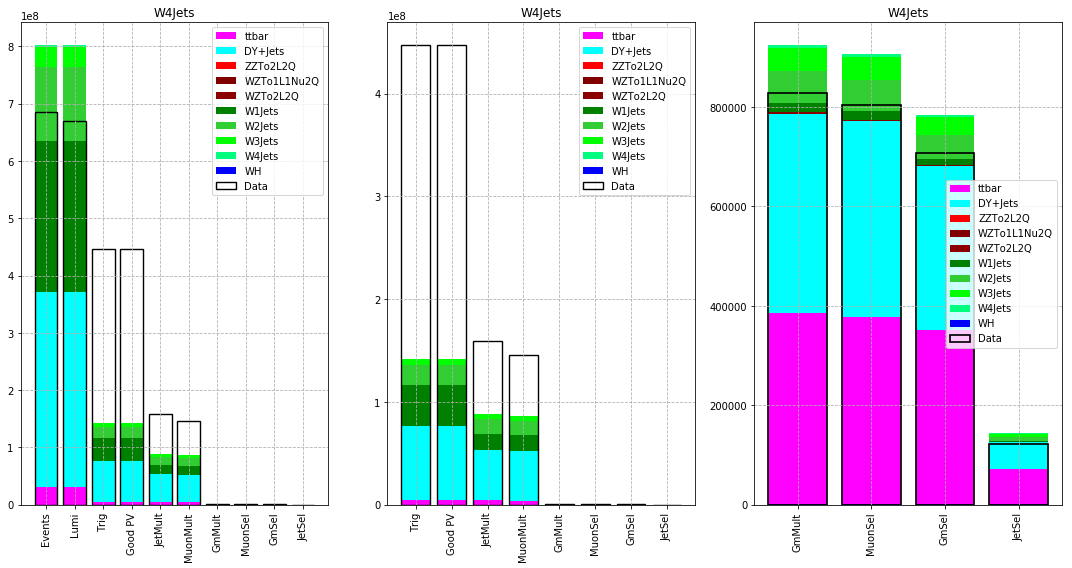

In [8]:
ticks  = ['Events', 'Lumi','Trig','Good PV','JetMult','MuonMult','GmMult','MuonSel', 'GmSel','JetSel']
#legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W1Jets", "W2Jets", "W3Jets", 'W4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
          

axisLog = False
#axisLog = True

N = 11
nx,ny,n = 1, 3,1
fig = plt.figure(figsize=(15,8))
for j in range(len(listSamples[:-2])):
    #if j != 0 : break
    Event = data[j].TotalEvent_SF
    if j == 0: bottoms = np.array(Event)*0
    #-----------------------------------------------    
    t0 = 1
    n = 1
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-1]) - 1:
        ax = plt.gca()
        ax.set_yscale('log')
    
    #print("-- "+data[j].name + ":: " + str(data[j].TotalEvent_SF[t0:N]))
    #print("-- "+data[j].name + ":: " + str(bottoms[t0:N]))
    #print()
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
    #-----------------------------------------------
    t0 = 3
    n = 2
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-2]) - 1:
        ax = plt.gca()
        ax.set_yscale('log')
    
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')
    #-----------------------------------------------
    n = 3
    t0 = 7
    plt.subplot(nx,ny,n)
    if axisLog and j == len(listSamples[:-1]) -1 :
        ax = plt.gca()
        ax.set_yscale('log')
    plt.bar(
            range(1,N+1-t0), 
            Event[t0:N],
            color = Colors[j],
            bottom = bottoms[t0:N],
            label = listSamples[j],
           )
    plt.legend()
    plt.title(listSamples[j])
    plt.grid(linestyle='--')
    plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')

    
    bottoms += Event

#--------------------------------------------------------
#--------------------------------------------------------
#--------------------------------------------------------    
Event = data[-2].TotalEvent_SF    
    
n = 1
t0 = 1
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-2],
        bottom = bottoms[t0:N]*0,
        linewidth = 1.4,
        label = listSamples[-2],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')        
    


n = 2
t0 = 3
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-2],
        bottom = bottoms[t0:N]*0,
        linewidth = 1.4,
        label = listSamples[-2],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')    
    
n = 3
t0 = 7
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-2],
        bottom = bottoms[t0:N]*0,
        linewidth = 1.7,
        label = listSamples[-2],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')    

#--------------------------------------------------------
#--------------------------------------------------------
#--------------------------------------------------------
Event = data[-1].TotalEvent_SF    
    
n = 1
t0 = 1
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.4,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')        
    


n = 2
t0 = 3
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.4,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')    
    
n = 3
t0 = 7
plt.subplot(nx,ny,n)
if axisLog:
    ax = plt.gca()
    ax.set_yscale('log')
plt.bar(
        range(1,N+1-t0), 
        Event[t0:N],
        color = Colors[-1],
        bottom = bottoms[t0:N]*0,
        fill = False,
        linewidth = 1.7,
        label = listSamples[-1],
       )
plt.legend()
plt.title(listSamples[j])
plt.grid(linestyle='--')
plt.xticks(range(1,N+1-t0), ticks[t0-1:N+1],rotation='vertical')

plt.tight_layout()
if axisLog:
    fig.savefig(figpath+'cutflow_log_ALL.png')
else:
    fig.savefig(figpath+'cutflow_ALL.png')
plt.show()

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in multiply


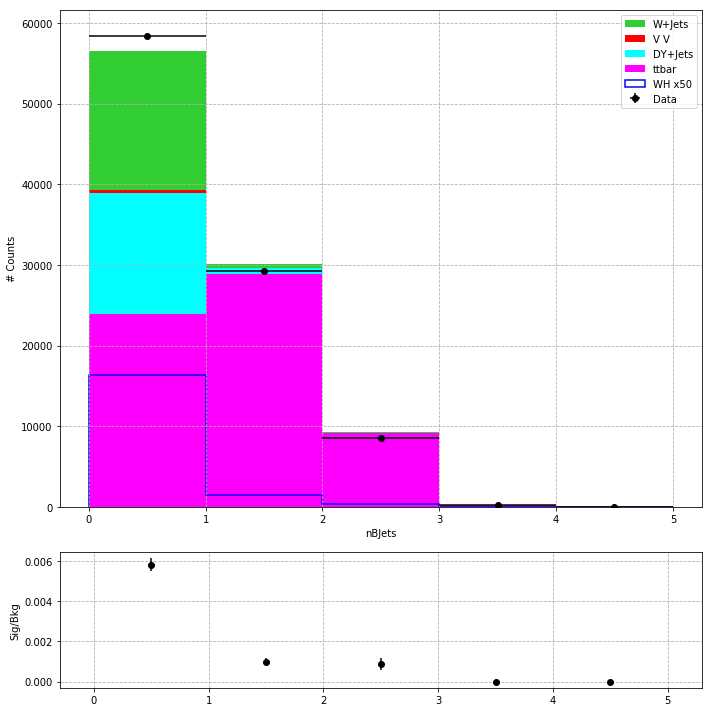

In [9]:

colors      = ['magenta',     'cyan',    'r',   'limegreen',    "b",    'k']
legend      = [  "ttbar",  "DY+Jets",   "V V", "W+Jets",   "WH", 'Data'] 

var,part = 'nBJets',''
nBJets = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg = plt.hist(
        nBJets[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        )

plt.legend()

hsig = plt.hist(
        nBJets[-2],
        range    = Help.plotOpsAll[-2]['range'][var][part],
        bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = colors[-2],
        weights   = np.ones(np.shape(nBJets[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    nBJets[-1],
                    bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part]
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     = 'k',
            marker    = 'o',
            linestyle = '',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nBJets')
plt.legend()
#plt.show()


plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            (hsig[0]/mag)/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.xlim((Help.plotOpsAll[-1]['range'][var][part][0]-0.3,Help.plotOpsAll[-1]['range'][var][part][1]+0.3))
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"nBJets.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply


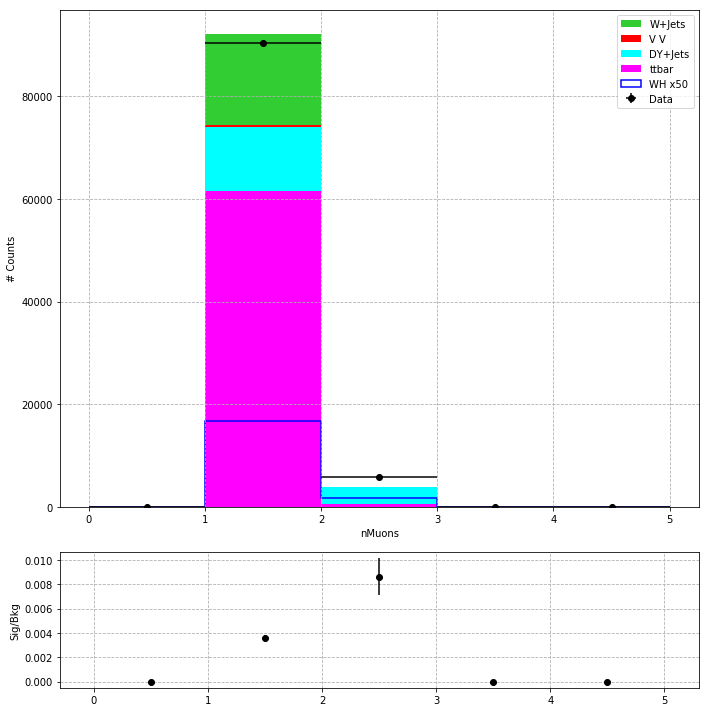

In [10]:
var,part = 'nMuons',''
nMuons = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
#nMuons = [d.nMuons for d in data]
fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg = plt.hist(
        nMuons[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        )
plt.legend()

hsig = plt.hist(
        nMuons[-2],
        range     = Help.plotOpsAll[-2]['range'][var][part],
        bins      = Help.plotOpsAll[-2]['bins'][var][part],
        histtype  = Help.plotOpsAll[-2]['histtype'],
        stacked   = Help.plotOpsAll[-2]['stacked'],
        label     = legend[-2]+" x"+str(mag),
        color     = colors[-2],
        weights   = np.ones(np.shape(nMuons[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    nMuons[-1],
                    bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part]
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nMuons')
plt.legend()
#plt.show()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #(hsig[0]/mag)/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )

plt.xlim((Help.plotOpsAll[-1]['range'][var][part][0]-0.3,Help.plotOpsAll[-1]['range'][var][part][1]+0.3))
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"nMuons.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in multiply


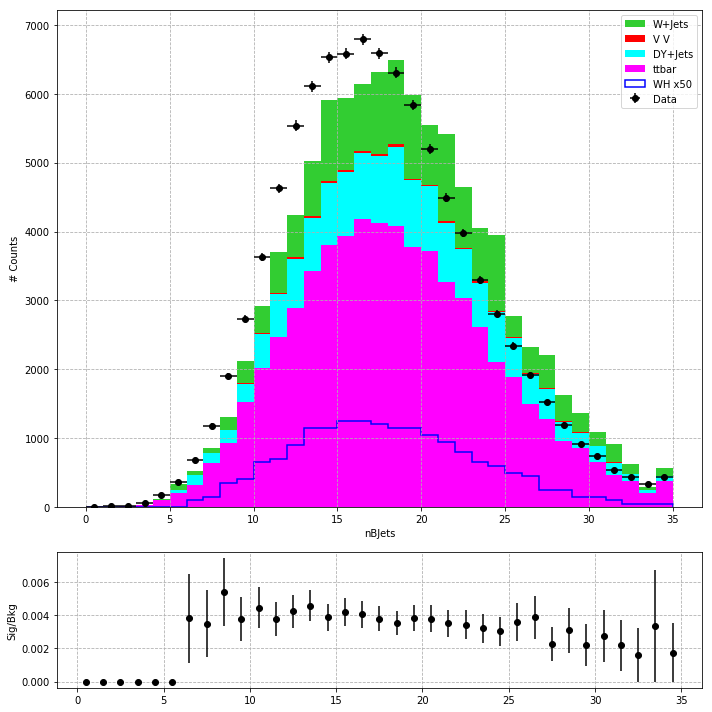

In [11]:
var,part = 'nPV',''
nBJets = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        nBJets[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        )
plt.legend()

hsig = plt.hist(
        nBJets[-2],
        range    = Help.plotOpsAll[-2]['range'][var][part],
        bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = colors[-2],
        weights   = np.ones(np.shape(nBJets[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    nBJets[-1],
                    bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part]
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nBJets')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #(hsig[0]/mag)/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"nPV.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide


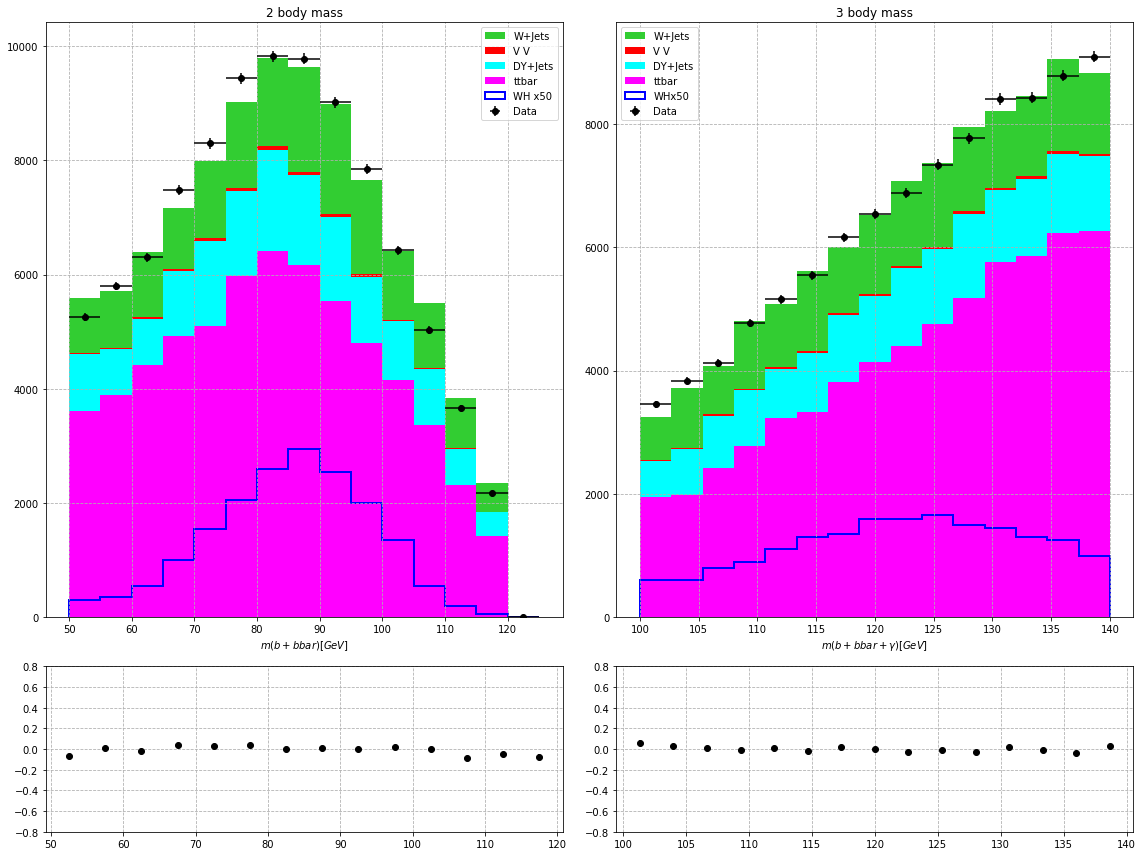

In [12]:
fig = plt.figure(figsize = (16,12))
var,part = 'm2',''

nx,ny = 2,2
n = 1
plt.subplot2grid((4,2),(0,0),rowspan = 3, colspan = 1)
M2 = values['m2']['']
M3 = values['m3']['']
title_lab  = "2 body mass"
COL        = colors[0:len(M2)]#[i]
bHiggs     = 20
rHiggs     = [80,200]
#weight     = np.array([w[i] for ii in range(len(M2))])
weight     = np.array([[1 for i in range(len(M2[ii]))]for ii in range(len(M2))])

ax = plt.gca()
h2_bg = ax.hist(
        M2[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][part],
        range     = Help.plotOpsAll[0][   'range'][var][part],
        histtype  = Help.plotOpsAll[0]['histtype'],
        stacked   = Help.plotOpsAll[0]['stacked'],
        color     = COL[:-2],
        weights   = weight[:-2],
        label     = legend[:-2],
        #linestyle = line_style[k],
        linewidth = 1.2
        )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--')

h2_sig = ax.hist(
        M2[-2],
        bins      = Help.plotOpsAll[-2][    'bins'][var][part],
        range     = Help.plotOpsAll[-2][   'range'][var][part],
        histtype  = Help.plotOpsAll[-2]['histtype'],
        stacked   = Help.plotOpsAll[-2]['stacked'],
        color     = COL[-2],
        weights   = np.array(weight[-2])*mag,
        label     = legend[-2]+ " x"+str(mag),
        linewidth = 2
        )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--') 


y2,x2 =np.histogram(
                    M2[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part],
                    )
x2b = (x2[1:len(x2)] + x2[0:-1])/2
ax = plt.gca()
h2_data = [y2,x2]

ax.errorbar(
            x2b,y2,
            xerr = np.diff(x2)/2,yerr = np.sqrt(y2),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
            )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar)[GeV]$")
ax.grid(linestyle='--')


h = (h2_bg[0][-1]+h2_sig[0]/mag )
rDataMC = y2/(h2_bg[0][-1]+h2_sig[0]/mag) - 1 

plt.subplot2grid((4,2),(3,0),rowspan = 1, colspan = 1)
ax = plt.gca()
ax.errorbar(
        x2b, rDataMC,
        yerr = y2/h*np.sqrt(1/y2+1/h),
        color = 'k',
        marker = 'o',
        linestyle = '',
        linewidth = 1.5
       )
ax.grid(linestyle = '--')
ax.set_ylim(-0.8,0.8)
    
#_--------------/--------------------------------
#_----------------------------------------------
#_----------------------------------------------
weight     = np.array([[1 for i in range(len(M3[ii]))]for ii in range(len(M3))])    

var = 'm3'
n = 2
title_lab  = "3 body mass"
plt.subplot2grid((4,2),(0,1),rowspan = 3, colspan = 1)
ax = plt.gca()
h3_bg = ax.hist(
        M3[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][part],
        range     = Help.plotOpsAll[0][   'range'][var][part],
        histtype  = Help.plotOpsAll[0]['histtype'],
        stacked   = Help.plotOpsAll[0]['stacked'],
        color     = COL[:-2],
        weights   = weight[:-2],
        label     = legend[:-2],
        linewidth = 1.2
        )
ax.legend(prop={'size': 10})


ax = plt.gca()
h3_sig = ax.hist(
                M3[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][part],
                range     = Help.plotOpsAll[-2][   'range'][var][part],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = COL[-2],
                weights   = np.array(weight[-2])*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
ax.set_title(title_lab)
ax.set_xlabel(r"$m(b+bbar+\gamma)[GeV]$")
ax.grid(linestyle='--')    


y3,x3 =np.histogram(
                    M3[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
h3_data = [y3,x3]

ax.errorbar(
            x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})
    
    
h = (h3_bg[0][-1]+h3_sig[0]/mag )
rDataMC = y3/(h3_bg[0][-1]+h3_sig[0]/mag) - 1
plt.subplot2grid((4,2),(3,1),rowspan = 1, colspan = 1)    
ax = plt.gca()
ax.errorbar(
            x3b, rDataMC,
            yerr = y3/h*np.sqrt(1/y3+1/h),
            color = 'k',
            marker = 'o',
            linestyle = '',
            linewidth = 1.5
           )
ax.grid(linestyle = '--')
ax.set_ylim(-0.8,0.8)    
    
plt.tight_layout()
plt.show()
fig.savefig(figpath+"Mass.png")



# FIT this MTF

[1591.3055499   355.08336798  299.51045828  124.50415494   15.10549211]


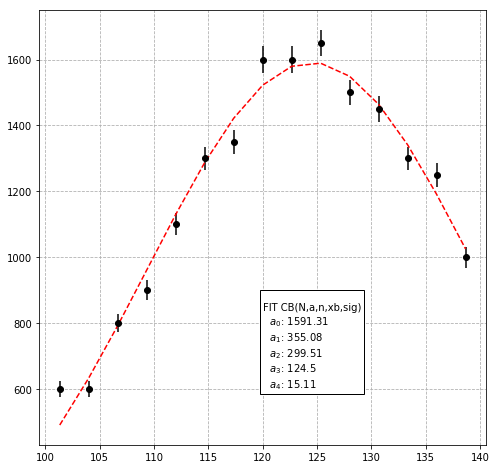

In [13]:
crystalBall = True
#crystalBall = False

Higgs = True
#Higgs = False
if crystalBall:
    if Higgs:
        h = h3_sig
        f = crystal_ball
        b = ([0,0,-10000,0,0],[20000,10000,10000,300,10000])
        p = [3000,1,100,125,30]
        bx = 120
        by = 600
        figname = 'Hmass_res_CB.png'
    else:     
        h = h2_sig
        f = crystal_ball
        b = ([0,0,-10000,0,0],[20000,10000,10000,100,10000])
        p = [3000,1,100,89,20]
        bx = 100
        by = (max(h[0])-min(h[0]))*0.8 + min(h[0])
        figname = 'Zmass_res_CB.png'
else:
    if Higgs:
        h = h3_sig
        f = gauss
        b = ([0,0,0,0],[20000,400,100,10000])
        p = [3000,125,30,0]
        bx = 120
        by = 600        
        figname = 'Hmass_res_Gauss.png'
    else:        
        h = h2_sig
        f = gauss
        b = ([0,0,0,0],[20000,200,100,10000])
        p = [3000,89,20,0]
        bx = 100
        by = (max(h[0])-min(h[0]))*0.8 + min(h[0])
        figname = 'Zmass_res_Gauss.png'        
    
fig = plt.figure(figsize=(8,8))
plt.errorbar(binCenters(h),h[0],
            yerr = np.sqrt(h[0]),
            color = 'k',
             fmt = 'o',
            )

coeff, var = curve_fit(
                        f,binCenters(h),h[0],
                        sigma = [100 for i in h[0]],
                        bounds = b,
                        p0 = p
                      )
print(coeff)

if crystalBall:
    text = '\nFIT CB(N,a,n,xb,sig)\n  '+r'$a_0$: {}'.format(round(coeff[0],2))+'\n  '+'$a_1$: {}'.format(round(coeff[1],2))+'\n  '+'$a_2$: {}'.format(round(coeff[2],2))+'\n  '+'$a_3$: {}'.format(round(coeff[3],2))+'\n  '+r'$a_4$: {}'.format(round(coeff[4],2))
else :
    text = '\nFIT '+r'$a_0 exp[\frac{(x-a_1)^2}{2*a_2^2}] + a_3$'+ '\n  '+r'$a_0$: {}'.format(round(coeff[0],2))+'\n  '+'$a_1$: {}'.format(round(coeff[1],2))+'\n  '+'$a_2$: {}'.format(round(coeff[2],2))+'\n  '+'$a_3$: {}'.format(round(coeff[3],2))

plt.plot(binCenters(h),f(binCenters(h),*coeff),
        color = 'r',
        linestyle = '--')

plt.text(bx,by,
         text,
         bbox = dict(boxstyle='square',
                    ec = 'k',
                    fc = 'w'
                    )
        )
plt.grid(linestyle='--')
fig.savefig(figpath+figname)

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in multiply


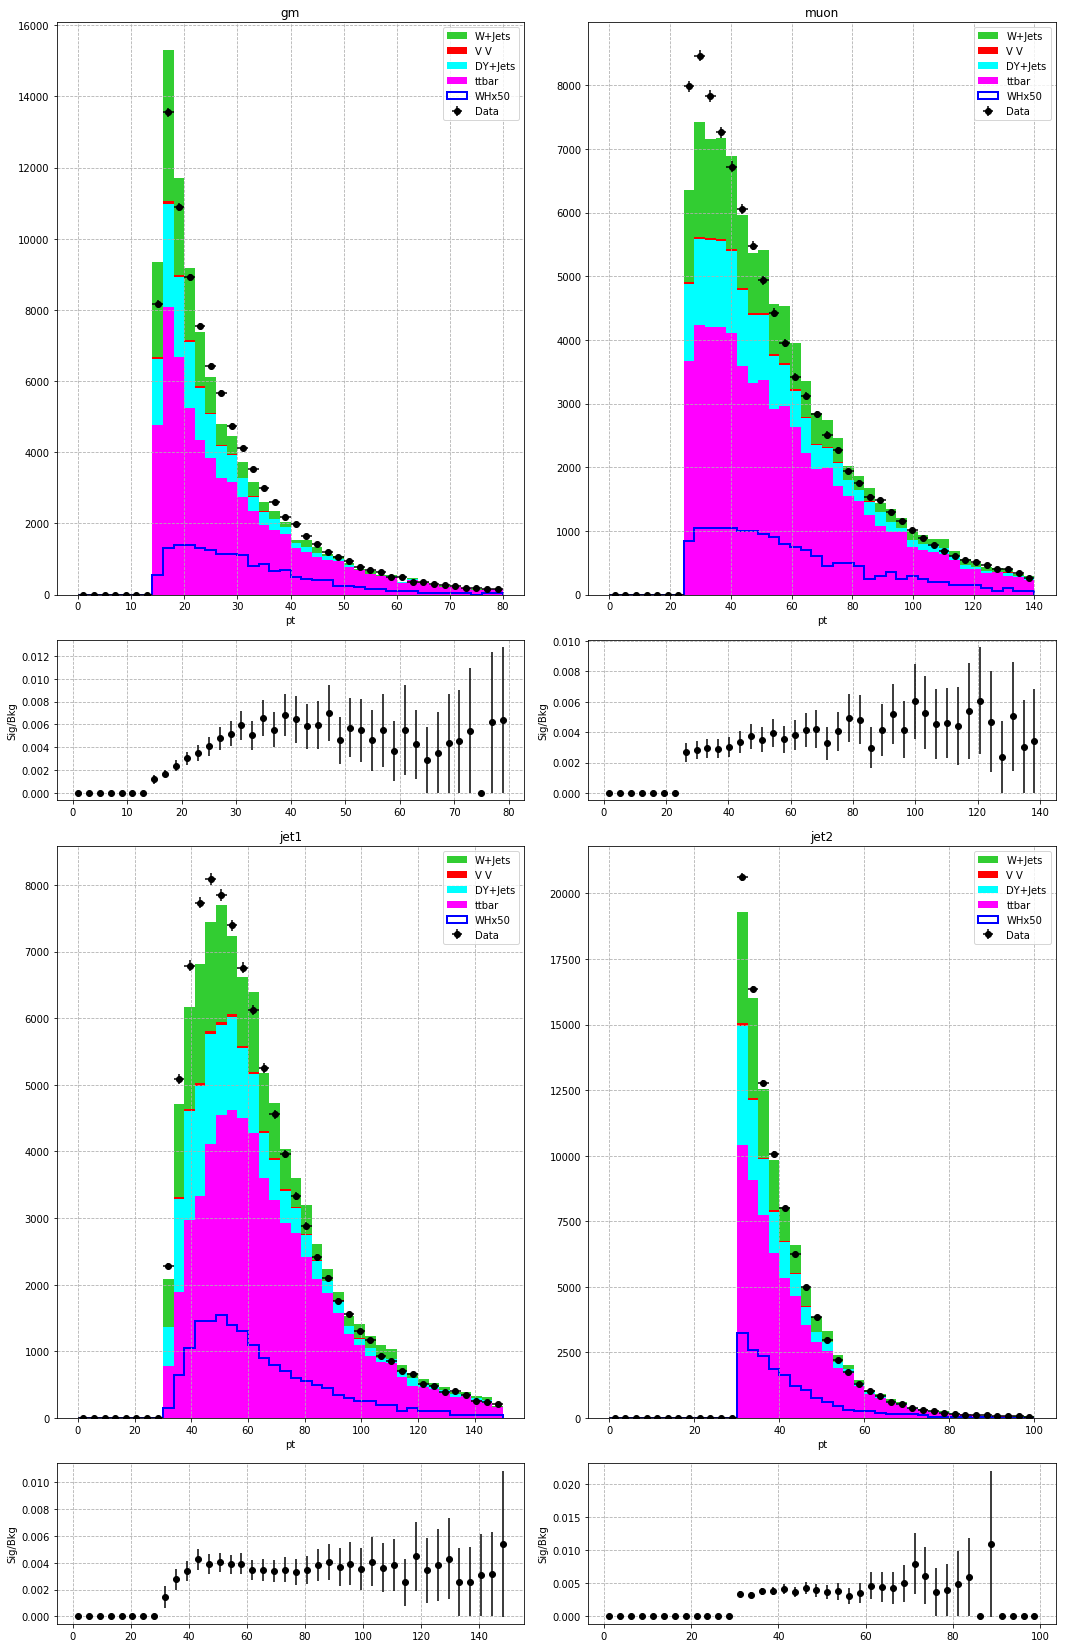

In [14]:
htemp = []
var = 'pt'
fig = plt.figure(figsize = (15, 23))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),Help.part[:-2]):
    nx,ny = 2,2
    #plt.subplot(nx,ny,j+1)
    #print(4*int(j/2),(j%2))
    plt.subplot2grid((8,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    #weight = np.array([1 for _ in values[var][k][:-2]]) 
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    htemp.append(h)
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    plt.subplot2grid((8,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #(hsig[0]/mag)/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')
    

#plt.show()

plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in multiply


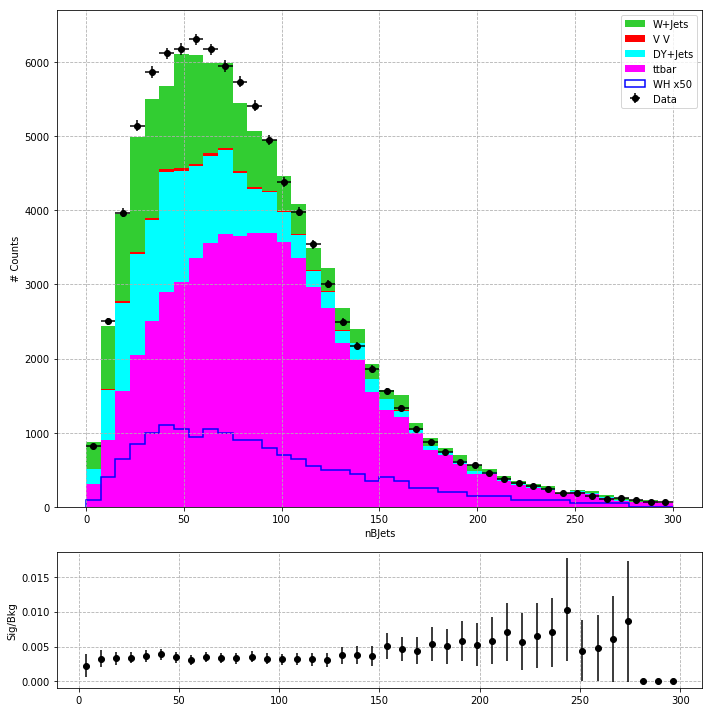

In [15]:

var,part = 'pt','dijetgm'
dijetgm = [
        TT.GetHistVal(var,part) , 
        DYJets.GetHistVal(var,part),  
        Help.joinData([ZZTo2L2Q, WZTo1L1Nu2Q, WZTo2L2Q],var,part), 
        Help.joinData([W1Jets, W2Jets, W3Jets,W4Jets],var,part),
        WH.GetHistVal(var,part),
        SingleMuon[var][part],
        ]
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        dijetgm[:-2],
        range    = Help.plotOpsAll[0]['range'][var][part],
        bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = colors[:-2],
        )
plt.legend()

hsig = plt.hist(
        dijetgm[-2],
        range    = Help.plotOpsAll[-2]['range'][var][part],
        bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = colors[-2],
        weights   = np.ones(np.shape(dijetgm[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    dijetgm[-1],
                    bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    range = Help.plotOpsAll[-1]['range'][var][part]
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('nBJets')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"dijetgm_pt.png")

In [16]:
values[var].keys()

dict_keys(['gm', 'muon', 'jet1', 'jet2', 'dijet', 'dijetgm'])

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


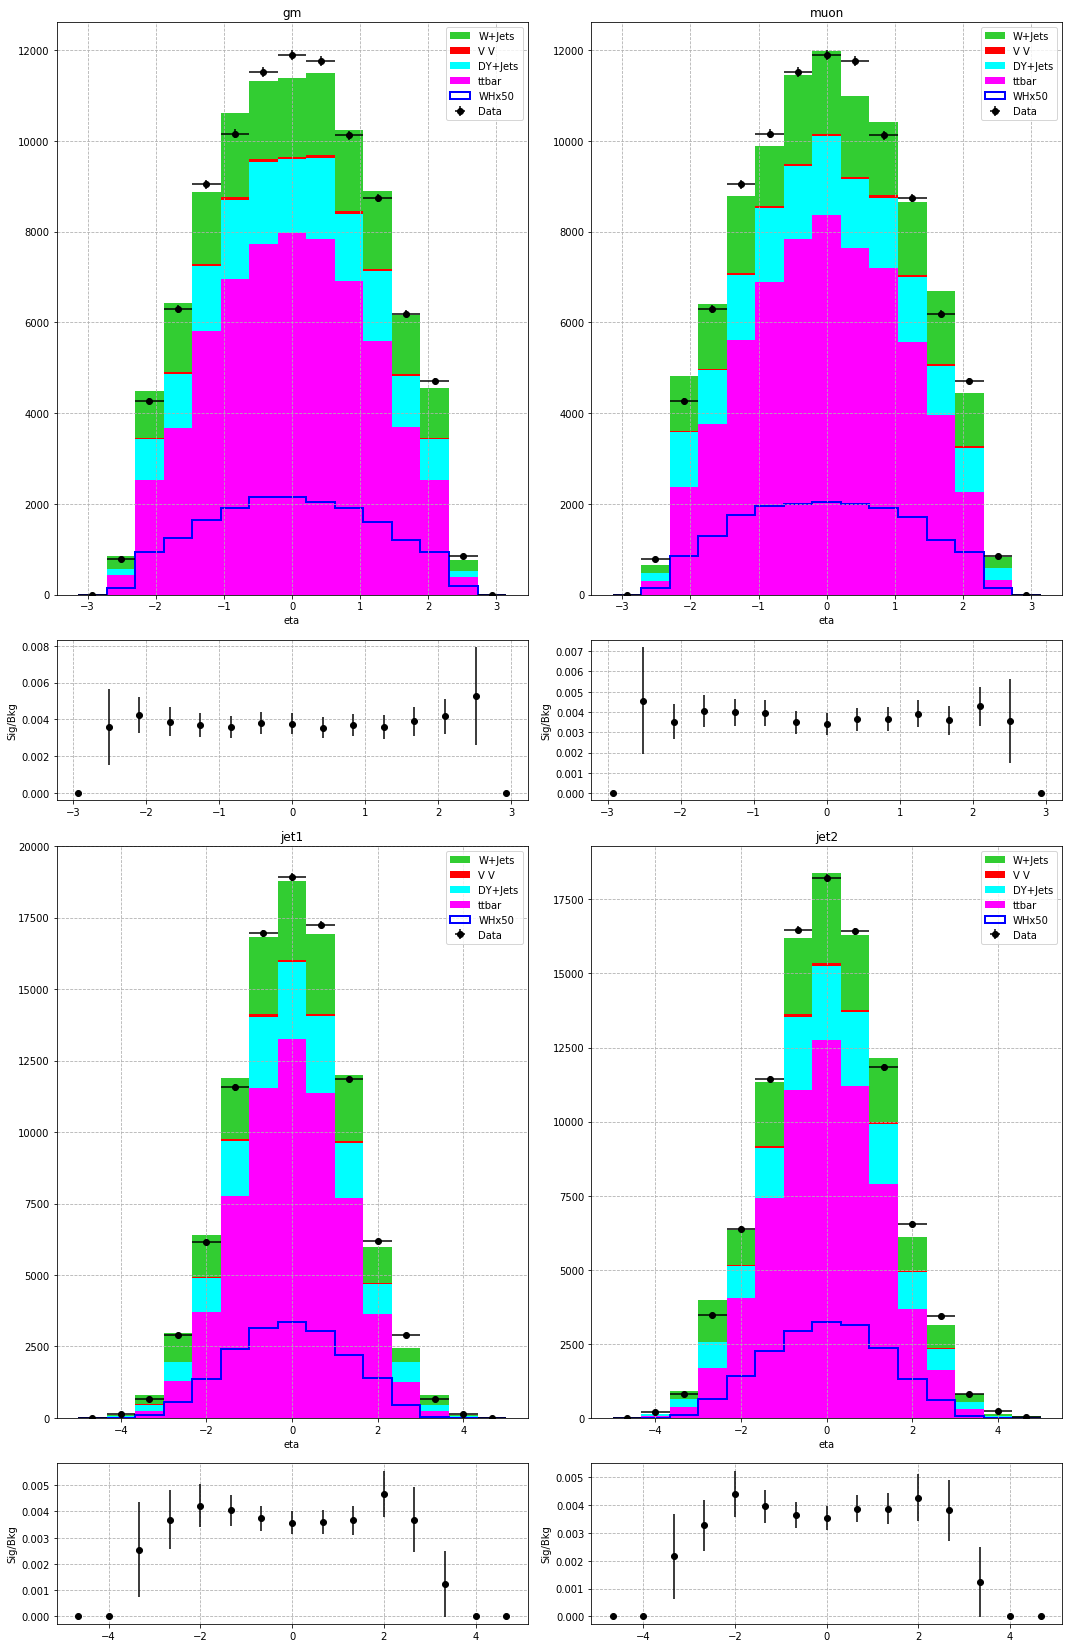

In [17]:
var = 'eta'
fig = plt.figure(figsize = (15, 23))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),Help.part[:-2]):
    nx,ny = 2,2
    #plt.subplot(nx,ny,j+1)
    plt.subplot2grid((8,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    #weight = np.array([w[i] for _ in PT]) 
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    plt.subplot2grid((8,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #hsig[0]/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')
    

plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


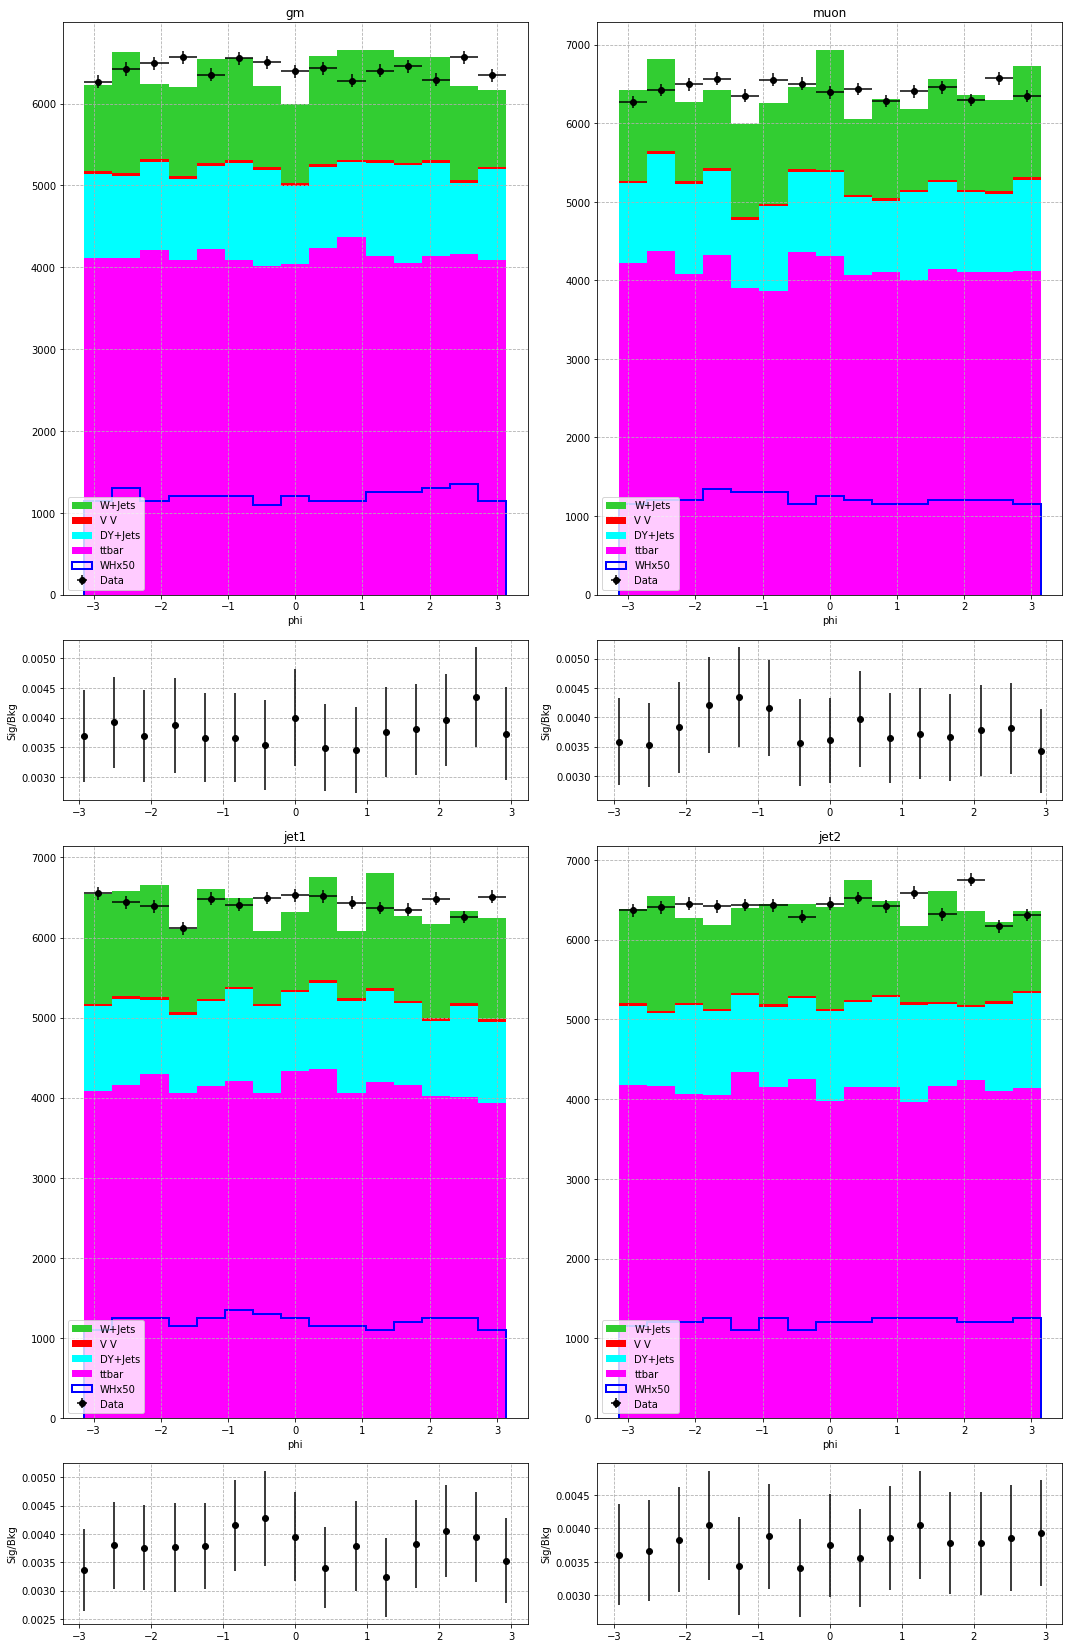

In [18]:
var = 'phi'
fig = plt.figure(figsize = (15, 23))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),Help.part[:-2]):
    nx,ny = 2,2
    #plt.subplot(nx,ny,j+1)
    plt.subplot2grid((8,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    plt.subplot2grid((8,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #hsig[0]/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')

plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


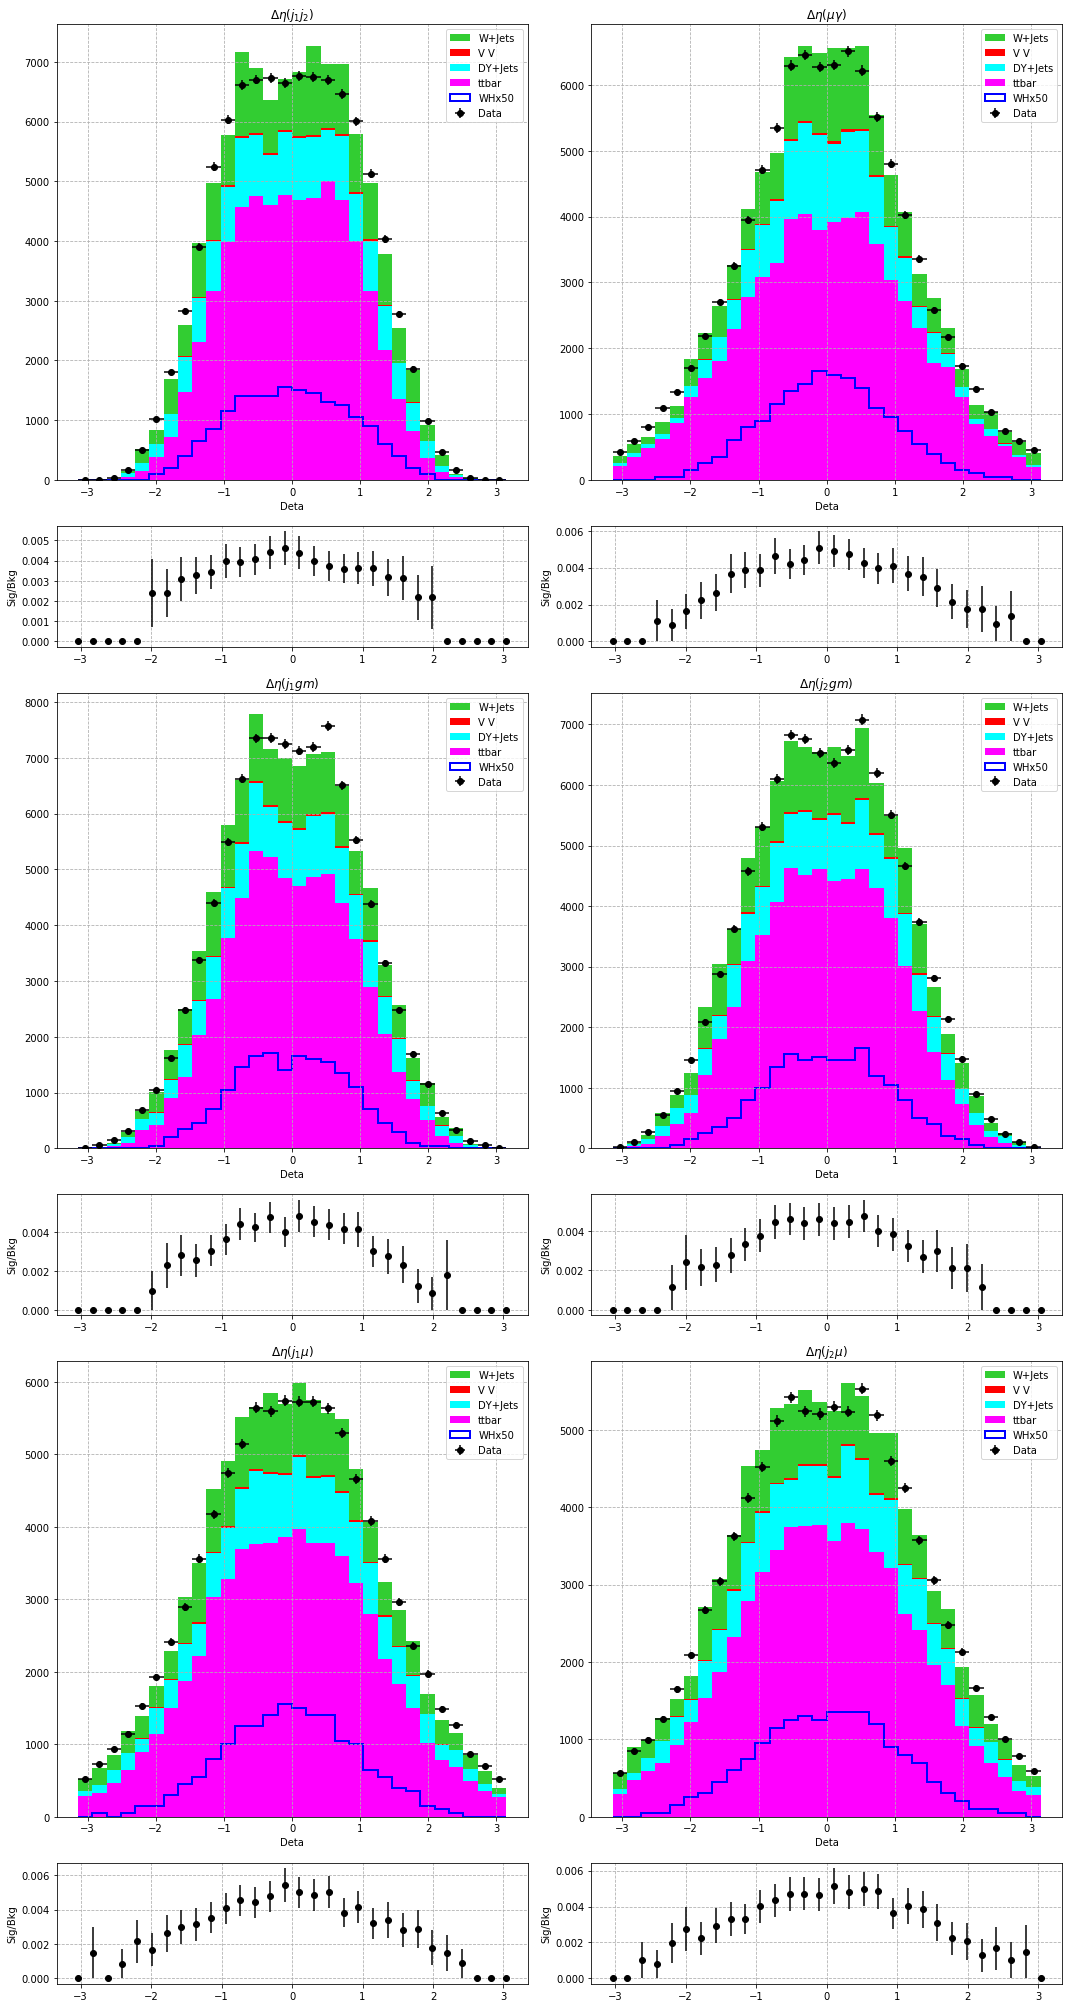

In [19]:
var = 'Deta'
fig = plt.figure(figsize = (15, 28))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),values[var].keys()):
    nx,ny = 3,2
    #plt.subplot(nx,ny,j+1)
    plt.subplot2grid((12,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    plt.subplot2grid((12,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #hsig[0]/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')

plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


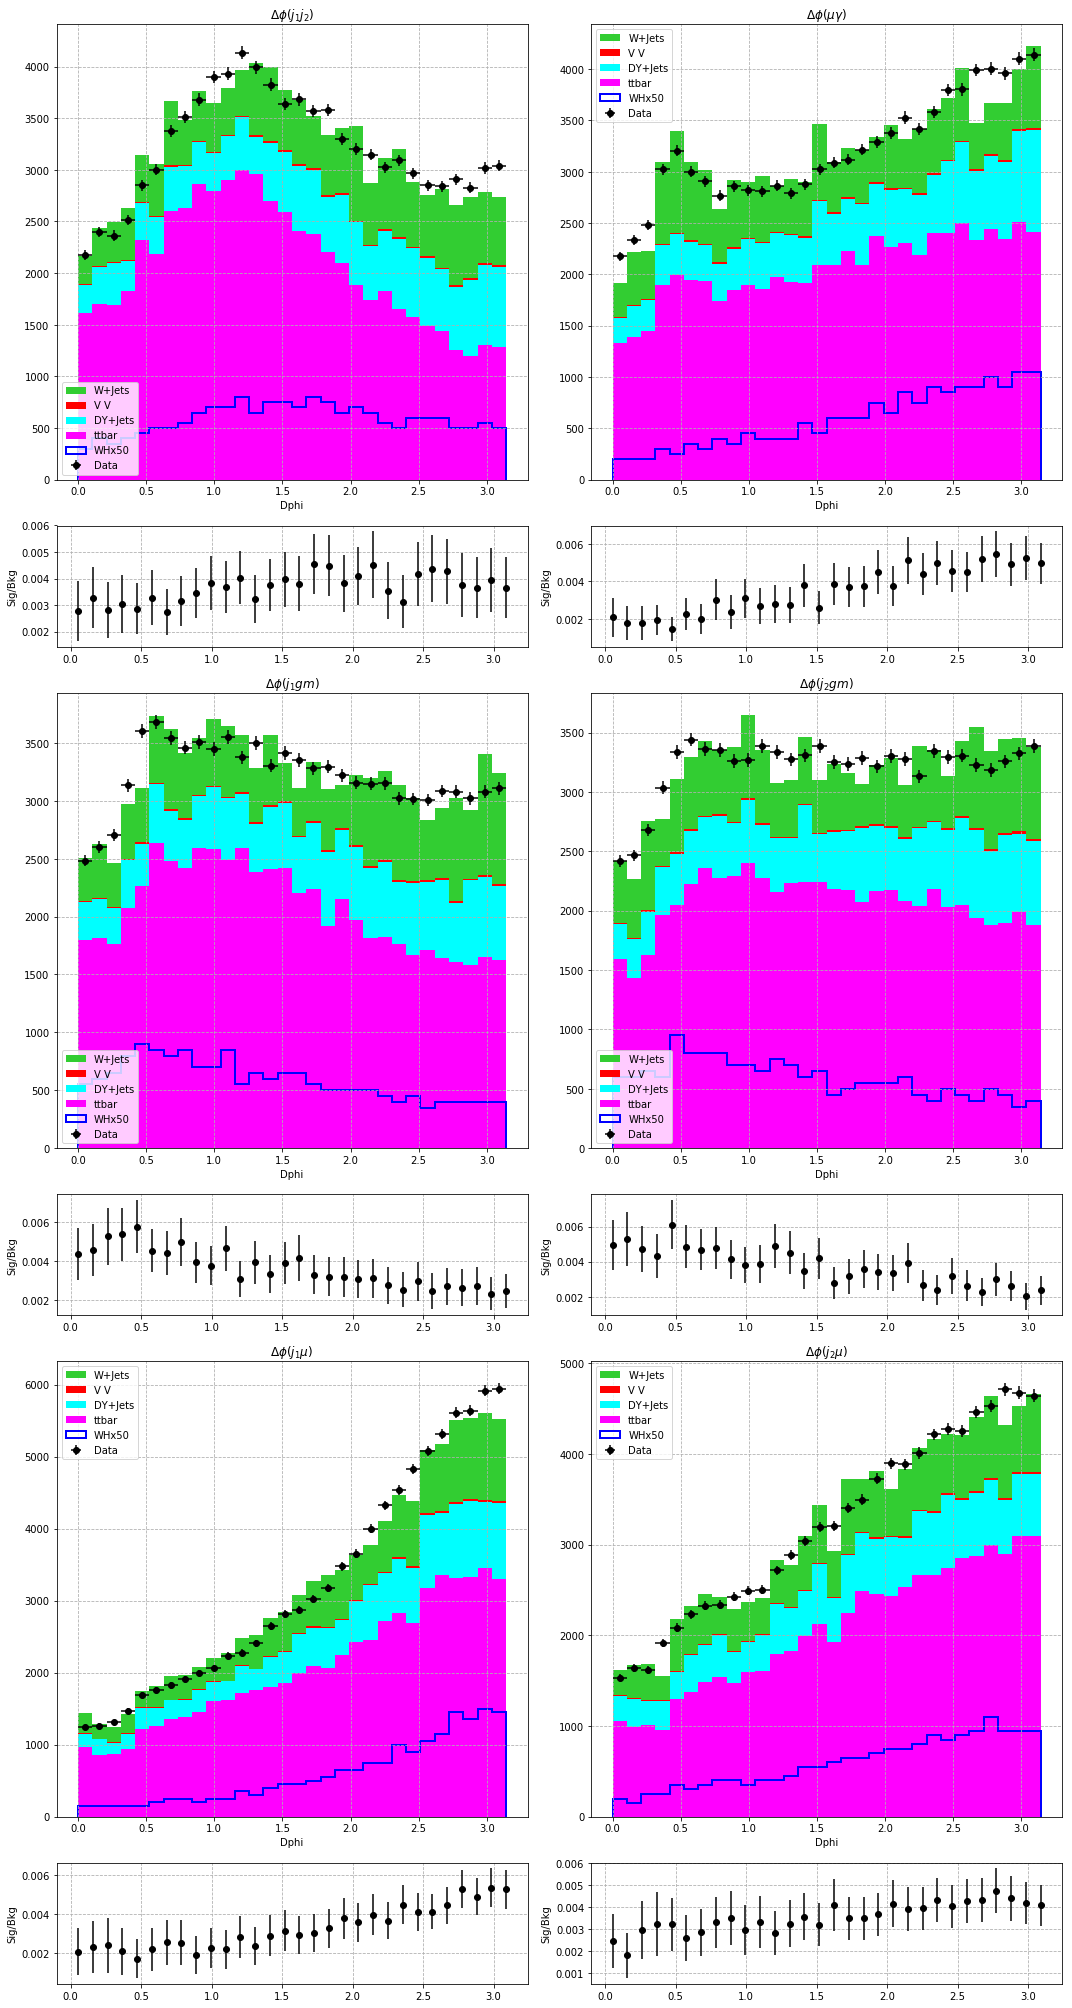

In [20]:
var = 'Dphi'
fig = plt.figure(figsize = (15, 28))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),values[var].keys()):
    nx,ny = 3,2
    #plt.subplot(nx,ny,j+1)
    plt.subplot2grid((12,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0][    'bins'][var][k],
            range     = Help.plotOpsAll[0][   'range'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            normed    = Help.plotOpsAll[0][  'normed'],
            stacked   = Help.plotOpsAll[0][ 'stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                    range     = Help.plotOpsAll[-2][   'range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2][ 'stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    plt.subplot2grid((12,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #hsig[0]/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply


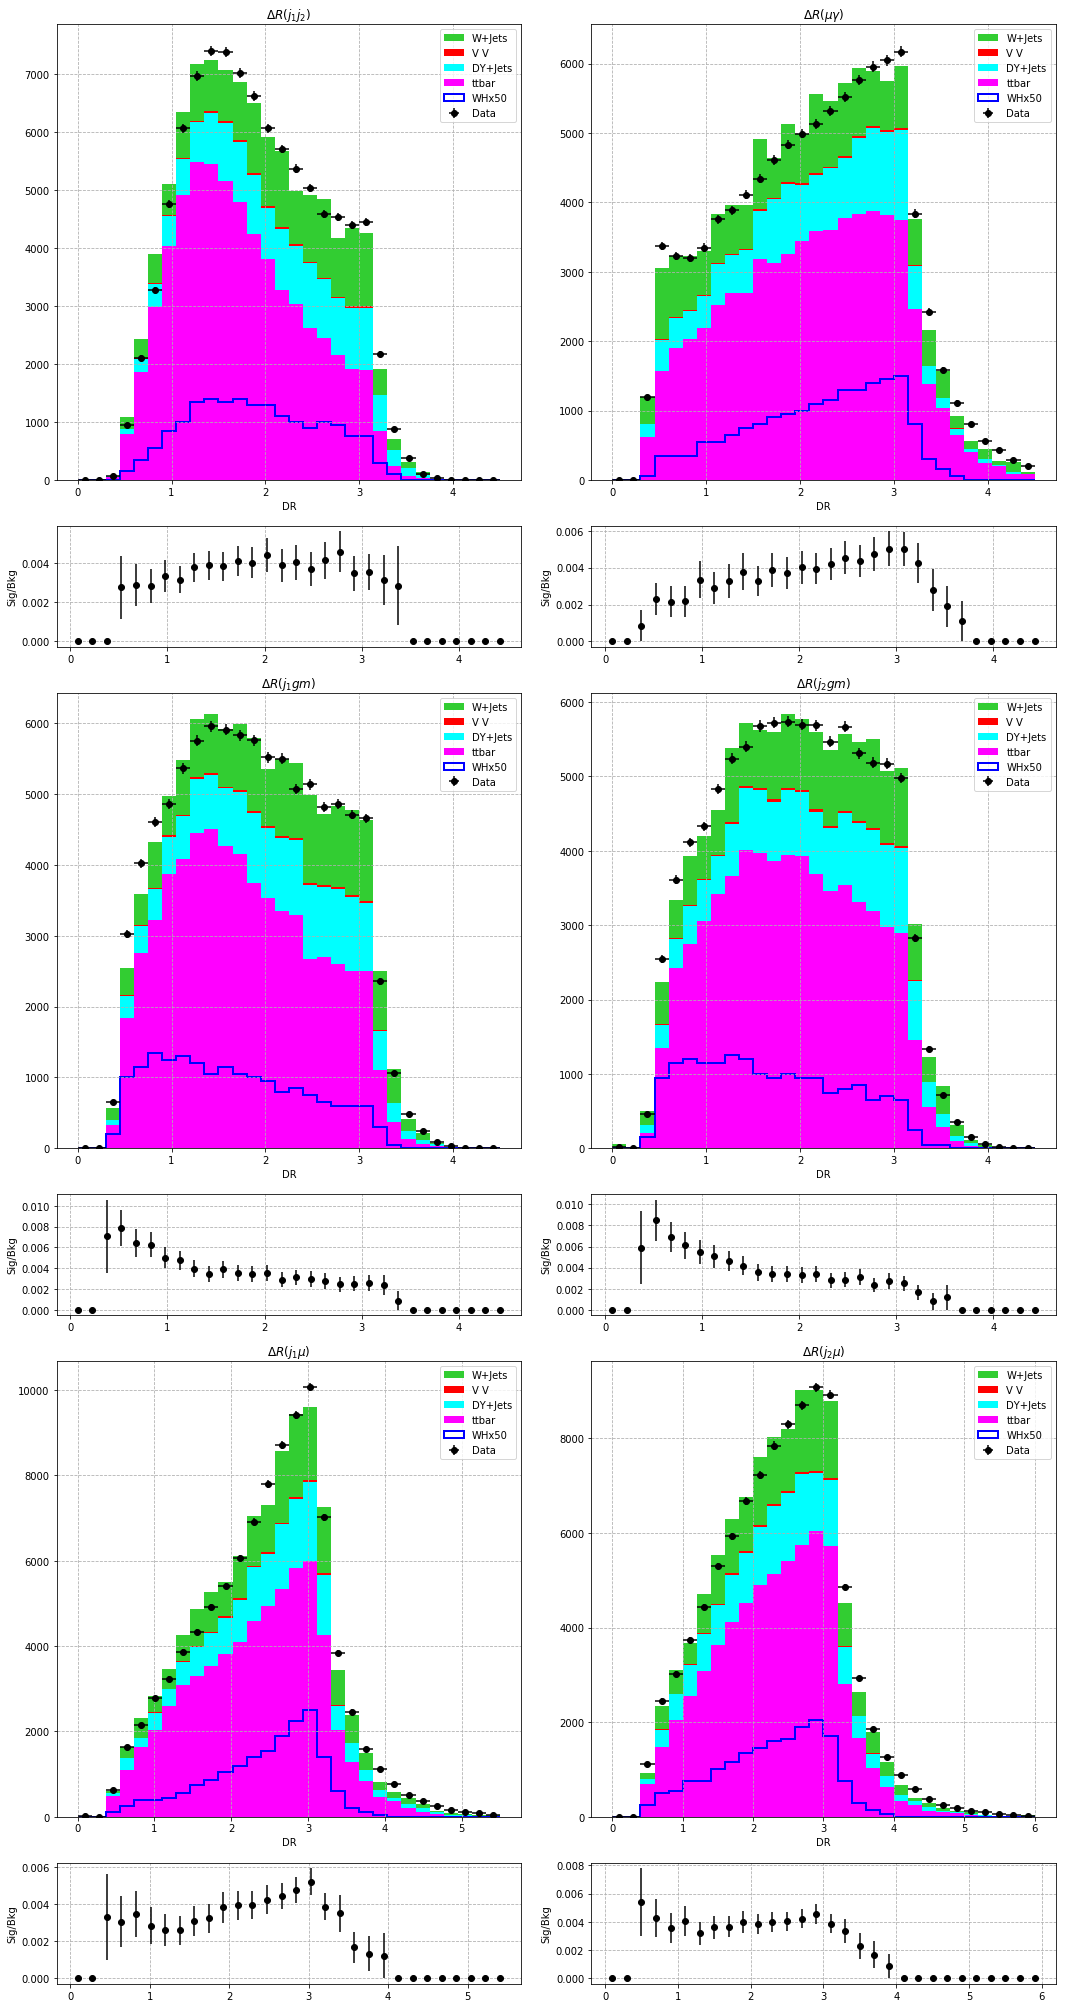

In [21]:
var = 'DR'
fig = plt.figure(figsize = (15, 28))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
for j,k in zip(range(len(values[var])),values[var].keys()):
    nx,ny = 3,2
    #plt.subplot(nx,ny,j+1)
    plt.subplot2grid((12,2),(4*int(j/2),(j%2)),rowspan = 3, colspan = 1)
    title_lab = k
    COL = [Help.plotOpsAll[i]['color'] for i in range(len(values[var][k]))]

    ax = plt.gca()
    hbkg = ax.hist(
            values[var][k][:-2],
            bins      = Help.plotOpsAll[0]['bins'][var][k],
            histtype  = Help.plotOpsAll[0]['histtype'],
            range     = Help.plotOpsAll[0]['range'][var][k],
            normed    = Help.plotOpsAll[0]['normed'],
            stacked   = Help.plotOpsAll[0]['stacked'],
            color     = COL[:-2],
            #weights   = weight,
            label     = legend,
            #linestyle = line_style[k],
            #linewidth = 1.2
            )
    ax.set_title(title_lab)
    ax.set_xlabel(var)
    ax.grid(linestyle='--')
    ax.legend(prop={'size':10})
    
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    ax = plt.gca()
    hsig = ax.hist(
                    values[var][k][-2],
                    bins      = Help.plotOpsAll[-2]['bins'][var][k],
                    range     = Help.plotOpsAll[-2]['range'][var][k],
                    histtype  = Help.plotOpsAll[-2]['histtype'],
                    stacked   = Help.plotOpsAll[-2]['stacked'],
                    color     = COL[-2],
                    weights   = np.ones(np.shape(values[var][k][-2]))*mag,
                    label     = legend[-2] + "x"+str(mag),
                    linewidth = 2
                    )
    ax.legend(prop={'size': 10})
    #----------------------------------------------------------------
    #----------------------------------------------------------------
    
    y3,x3 =np.histogram(
                        values[var][k][-1],
                        bins  = Help.plotOpsAll[-1]['bins'][var][k],
                        range = Help.plotOpsAll[-1]['range'][var][k]
                       )
    x3b = (x3[1:len(x3)] + x3[0:-1])/2
    ax = plt.gca()
    ax.errorbar(x3b,y3,
                xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
                color='k',
                marker='o',
                linestyle='',
                label = legend[-1]
               )
    ax.legend(prop={'size': 10})
    
    plt.subplot2grid((12,2),(3+4*int(j/2),(j%2)),rowspan = 1, colspan = 1)
    plt.grid(linestyle='--')
    plt.errorbar(
                (hsig[1][1:] + hsig[1][:-1])/2,
                [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
                #hsig[0]/hbkg[0][-1],
                yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
                linestyle = '',
                marker = 'o',
                color = 'k'
                )
    plt.ylabel('Sig/Bkg')

plt.tight_layout()        
plt.show()
fig.savefig(figpath+var+".png")

# Muon

Transverse mass of W 6400
Transverse mass of Mu 1600.011025


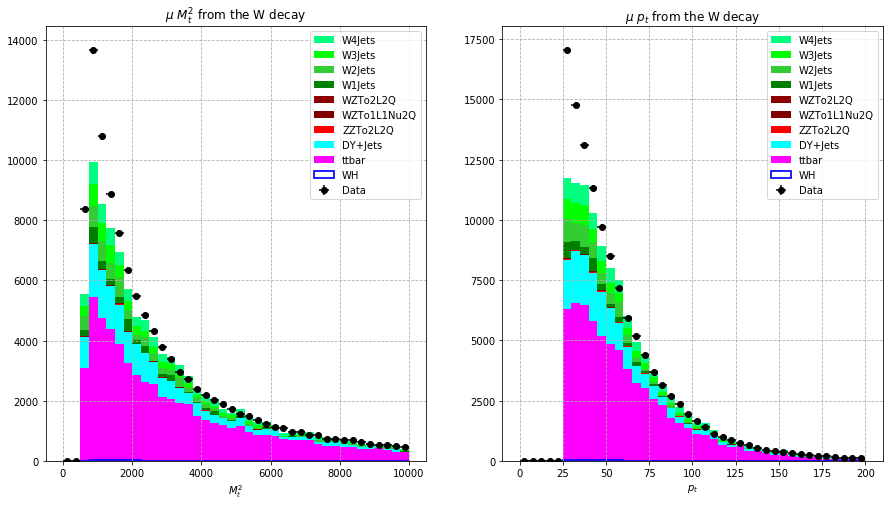

In [22]:
print("Transverse mass of W "+str(80**2)) # Transverse mass of Wp
print("Transverse mass of Mu "+str((0.105**2) + (80.0/2)**2)) # Transverse mass of mu, for Wpt = 0
Mt2   = [d.lep1_Mt2 for d in data]
lepPt = [d.lepton_pt for d in data]
w = [np.array([d.ScaleFactor() for _ in d.lep1_Mt2])*np.array(d.eventWeight)*np.array(d.genWeight) for d in data]

fig = plt.figure(figsize= (15,8))

plt.subplot(1,2,1)
plt.hist(
        Mt2[:-2],
        range = [0,10000],
        bins = 40,
        stacked = True,
        histtype = 'stepfilled',
        label     = listSamples[:-2],
        weights = w[:-2],
        color = Colors[:-2],
        )
plt.hist(
        Mt2[-2],
        range = [0,10000],
        bins = 40,
        stacked = False,
        histtype = 'step',
        linewidth = 1.7,
        label     = listSamples[-2],
        weights = w[-2],
        color = Colors[-2],
        )
plt.title(r"$\mu \  M_t^2$ from the W decay")
plt.xlabel(r"$M_t^2$")
plt.legend()
plt.grid(True,linestyle = '--')


y3,x3 =np.histogram(
                    Mt2[-1],
                    bins  = 40,
                    range =[0,10000],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})


#----------------------------------------------------
plt.subplot(1,2,2)
plt.hist(lepPt[:-2],
        range = [0,200],
        bins = 40,
        histtype = 'stepfilled',
        stacked = True,
        label     = listSamples[:-2],
        weights = w[:-2],
        color = Colors[:-2],
        )
plt.hist(lepPt[-2],
        range = [0,200],
        bins = 40,
        histtype = 'step',
        stacked = False,
        linewidth = 1.7,
        label     = listSamples[-2],
        weights = w[-2],
        color = Colors[-2]
        )

y3,x3 =np.histogram(
                    lepPt[-1],
                    bins  = 40,
                    range =[0,200],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})


plt.title(r"$\mu \  p_t$ from the W decay")
plt.xlabel(r"$p_t$")
plt.legend()
plt.grid(True,linestyle = '--')

fig.savefig(figpath+"Wvariables.png")
plt.show()

# MT W mass

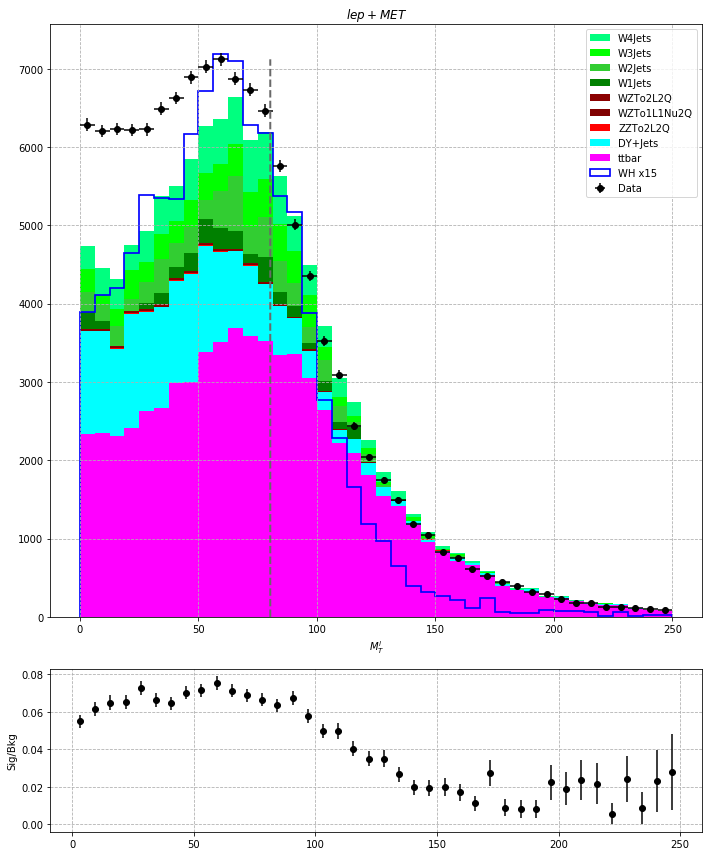

In [23]:
binx = 40
minx = 0
maxx = 250
mag = 15

Mt   = [d.Mt for d in data]
w = [np.array([d.ScaleFactor() for _ in d.Mt])*np.array(d.eventWeight)*np.array(d.genWeight) for d in data]

fig = plt.figure(figsize= (10,12))

#plt.subplot(1,2,1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
hbkg = plt.hist(
        Mt[:-2],
        range =[minx,maxx],
        bins = binx,
        stacked = True,
        histtype = 'stepfilled',
        label     = listSamples[:-2],
        weights = w[:-2],
        color = Colors[:-2],
        )
hsig = plt.hist(
        Mt[-2],
        range =[minx,maxx],
        bins = binx,
        stacked = False,
        histtype = 'step',
        linewidth = 1.7,
        label     = listSamples[-2]+' x'+str(mag),
        weights = w[-2]*0+mag,
        color = Colors[-2],
        )
plt.title(r"$\mu \  M_t^2$ from the W decay")
plt.xlabel(r"$M_t^2$")
plt.legend()
plt.grid(True,linestyle = '--')


y3,x3 =np.histogram(
                    Mt[-1],
                    bins = binx,
                    range =[minx,maxx],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2, yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})


plt.title(r"$lep + MET$")
plt.xlabel(r"$M^{l}_T$")
plt.legend()
plt.grid(True,linestyle = '--')

plt.plot(np.arange(0,max(y3))*0+80.3,np.arange(0,max(y3)),
         linestyle='--',
         color ='dimgrey',
        linewidth = 2)

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout() 

fig.savefig(figpath+"Mt.png")
plt.show()

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in double_scalars
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in multiply


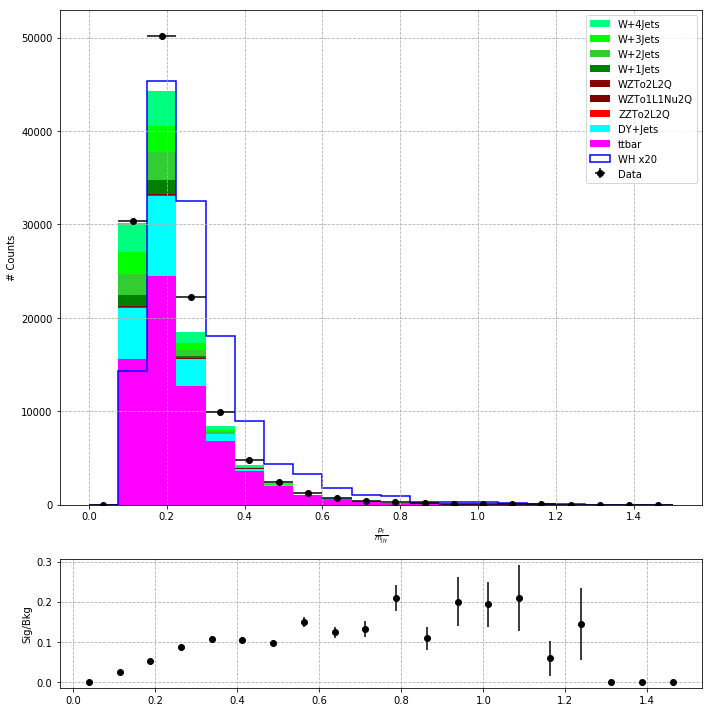

In [24]:
low = 0
high = 1.5
bi = 20
mag = 20

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Pt_frac_mass = [
        np.array(TT.photon_pt)/np.array(TT.dijetgm_m),#TT.GetHistVal(var,part) , 
        np.array(DYJets.photon_pt)/np.array(DYJets.dijetgm_m),
        np.array(ZZTo2L2Q.photon_pt)/np.array(ZZTo2L2Q.dijetgm_m),
        np.array(WZTo1L1Nu2Q.photon_pt)/np.array(WZTo1L1Nu2Q.dijetgm_m),
        np.array(WZTo2L2Q.photon_pt)/np.array(WZTo2L2Q.dijetgm_m),
        np.array(W1Jets.photon_pt)/np.array(W1Jets.dijetgm_m),
        np.array(W2Jets.photon_pt)/np.array(W2Jets.dijetgm_m),
        np.array(W3Jets.photon_pt)/np.array(W3Jets.dijetgm_m),
        np.array(W4Jets.photon_pt)/np.array(W4Jets.dijetgm_m),
        np.array(WH.photon_pt)/np.array(WH.dijetgm_m),
        np.array(Muon.photon_pt)/np.array(Muon.dijetgm_m),
        ]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        Pt_frac_mass[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.legend()

hsig = plt.hist(
        Pt_frac_mass[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(Pt_frac_mass[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    Pt_frac_mass[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel(r'$\frac{p_t}{m_{jj\gamma}}$')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"gmPT_frac_dijetgmM.png")

# HIGSS - LEPTON

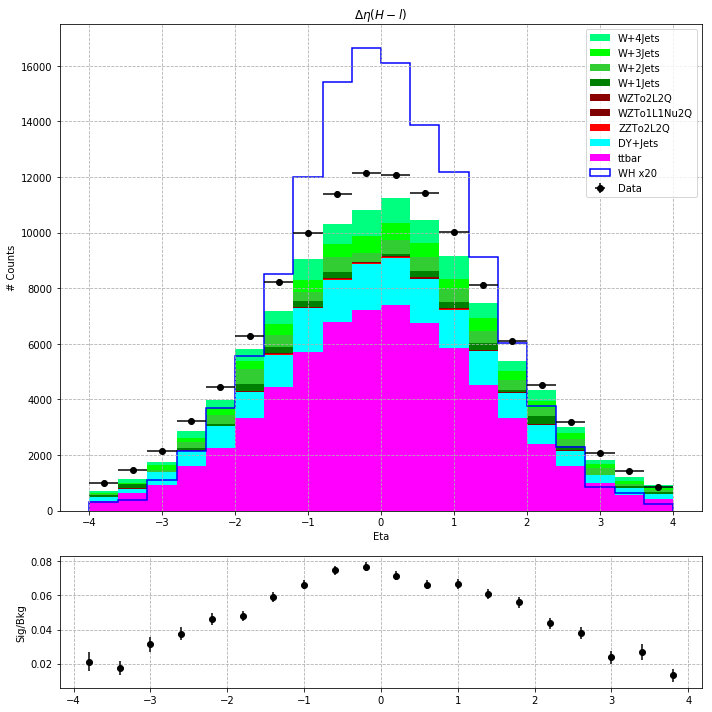

In [25]:
low = -4
high = 4
bi = 20
mag = 20

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
#dijetgm_lep_eta = [  
#        np.array(TT.lepton_eta) - np.array(TT.dijetgm_eta),
#        np.array(DYJets.lepton_eta) - np.array(DYJets.dijetgm_eta),
#        np.array(ZZTo2L2Q.lepton_eta) - np.array(ZZTo2L2Q.dijetgm_eta),
#        np.array(WZTo1L1Nu2Q.lepton_eta) - np.array(WZTo1L1Nu2Q.dijetgm_eta),
#        np.array(WZTo2L2Q.lepton_eta) - np.array(WZTo2L2Q.dijetgm_eta),
#        np.array(W1Jets.lepton_eta) - np.array(W1Jets.dijetgm_eta),
#        np.array(W2Jets.lepton_eta) - np.array(W2Jets.dijetgm_eta),
#        np.array(W3Jets.lepton_eta) - np.array(W3Jets.dijetgm_eta),
#        np.array(W4Jets.lepton_eta) - np.array(W4Jets.dijetgm_eta),
#        np.array(WH.lepton_eta) - np.array(WH.dijetgm_eta),
#        np.array(Muon.lepton_eta) - np.array(Muon.dijetgm_eta),
#        ]
dijetgm_lep_eta = [np.array(d.lepton_eta) - np.array(d.dijetgm_eta) for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
title_lab = r'$\Delta \eta (H-l)$'
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        dijetgm_lep_eta[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.title(title_lab)
plt.legend()

hsig = plt.hist(
        dijetgm_lep_eta[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(dijetgm_lep_eta[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    dijetgm_lep_eta[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Eta')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"H_lep_eta.png")

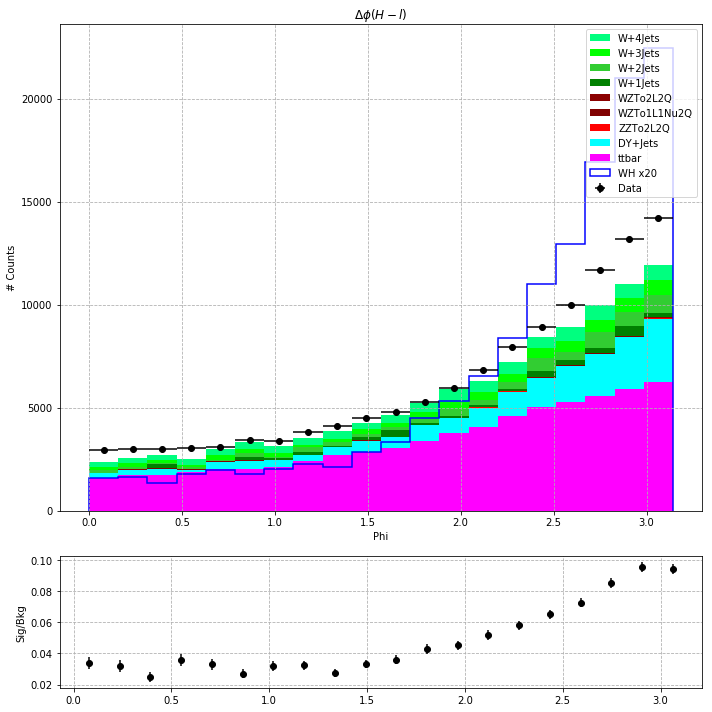

In [26]:
low = 0
high = np.pi
bi = 20
mag = 20

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
dijetgm_lep_phi = [
                    [delta_phi(lep_phi,H_phi) for lep_phi , H_phi in zip(np.array(d.lepton_phi), np.array(d.dijetgm_phi))] 
                    for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
title_lab = r'$\Delta \phi (H-l)$'
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        dijetgm_lep_phi[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.title(title_lab)
plt.legend()

hsig = plt.hist(
        dijetgm_lep_phi[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(dijetgm_lep_phi[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    dijetgm_lep_phi[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Phi')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"H_lep_phi.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in multiply


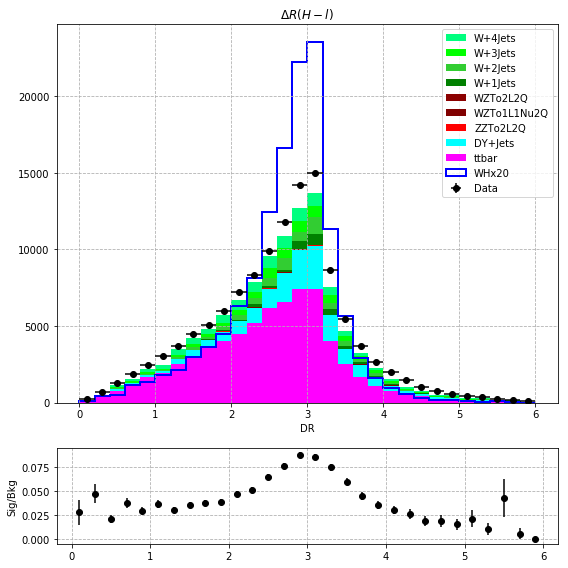

In [27]:
low,high = 0,6
mag = 20
bi = 20
var = 'DR'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
DR = [
        [np.sqrt(eta**2+phi**2) for eta , phi in zip(dijetgm_lep_eta[i],dijetgm_lep_phi[i])] 
        for i in range(len(data))]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta R (H-l)$'

ax = plt.gca()
hbkg = ax.hist(
        DR[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                DR[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(DR[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    DR[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"H_lep_DR.png")

# HIGSS - GAMMA

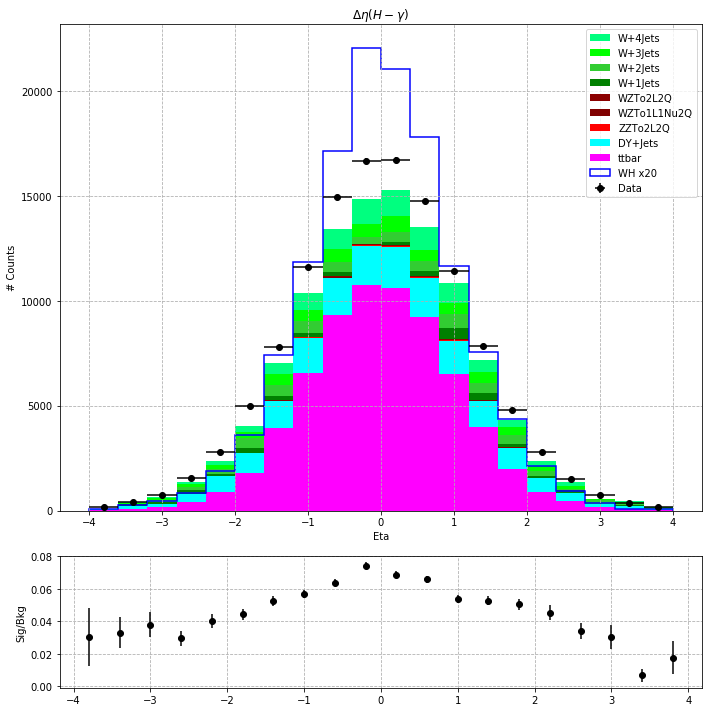

In [28]:
low = -4
high = 4
bi = 20
mag = 20

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
dijetgm_gm_eta = [
        np.array(TT.photon_eta) - np.array(TT.dijetgm_eta),
        np.array(DYJets.photon_eta) - np.array(DYJets.dijetgm_eta),
        np.array(ZZTo2L2Q.photon_eta) - np.array(ZZTo2L2Q.dijetgm_eta),
        np.array(WZTo1L1Nu2Q.photon_eta) - np.array(WZTo1L1Nu2Q.dijetgm_eta),
        np.array(WZTo2L2Q.photon_eta) - np.array(WZTo2L2Q.dijetgm_eta),
        np.array(W1Jets.photon_eta) - np.array(W1Jets.dijetgm_eta),
        np.array(W2Jets.photon_eta) - np.array(W2Jets.dijetgm_eta),
        np.array(W3Jets.photon_eta) - np.array(W3Jets.dijetgm_eta),
        np.array(W4Jets.photon_eta) - np.array(W4Jets.dijetgm_eta),
        np.array(WH.photon_eta) - np.array(WH.dijetgm_eta),
        np.array(Muon.photon_eta) - np.array(Muon.dijetgm_eta),
        ]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
title_lab = r'$\Delta \eta (H-\gamma)$'
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        dijetgm_gm_eta[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.title(title_lab)
plt.legend()

hsig = plt.hist(
        dijetgm_gm_eta[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(dijetgm_gm_eta[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    dijetgm_gm_eta[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Eta')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"H_gm_eta.png")

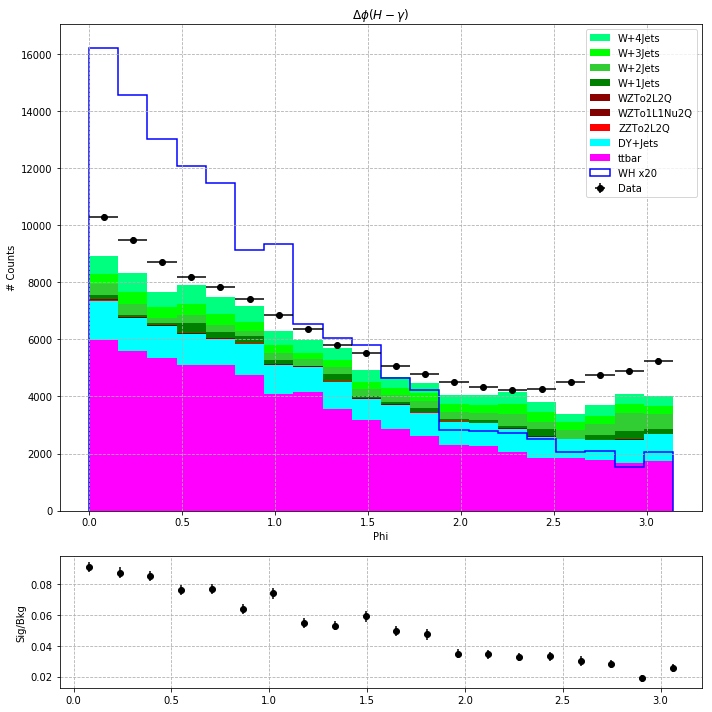

In [29]:
low = 0
high = np.pi
bi = 20
mag = 20

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
dijetgm_gm_phi = [
                    [delta_phi(gm_phi,H_phi) for gm_phi , H_phi in zip(np.array(d.photon_phi), np.array(d.dijetgm_phi))] 
                    for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
title_lab = r'$\Delta \phi (H-\gamma)$'
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        dijetgm_gm_phi[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.title(title_lab)
plt.legend()

hsig = plt.hist(
        dijetgm_gm_phi[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(dijetgm_gm_phi[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    dijetgm_gm_phi[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Phi')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"H_gm_phi.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


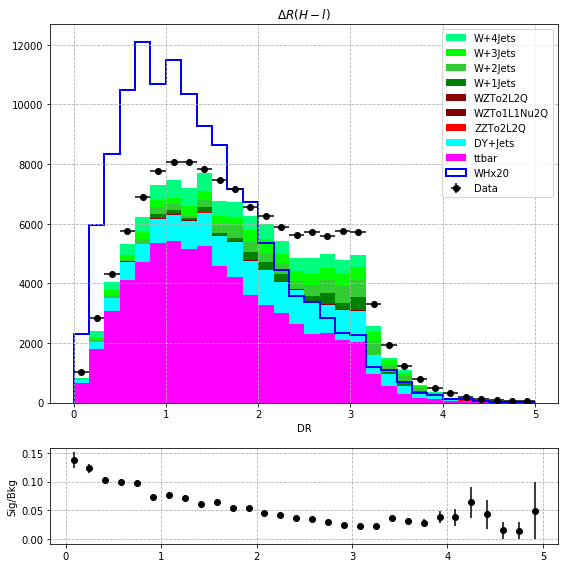

In [30]:
low,high = 0,5
mag = 20
bi = 20
var = 'DR'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
DR_higgs = [
        [np.sqrt(eta**2+phi**2) for eta , phi in zip(dijetgm_gm_eta[i],dijetgm_gm_phi[i])] 
        for i in range(len(data))]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta R (H-l)$'

ax = plt.gca()
hbkg = ax.hist(
        DR_higgs[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                DR_higgs[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(DR_higgs[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    DR_higgs[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"H_gm_DR.png")

# Z - LEPTON

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


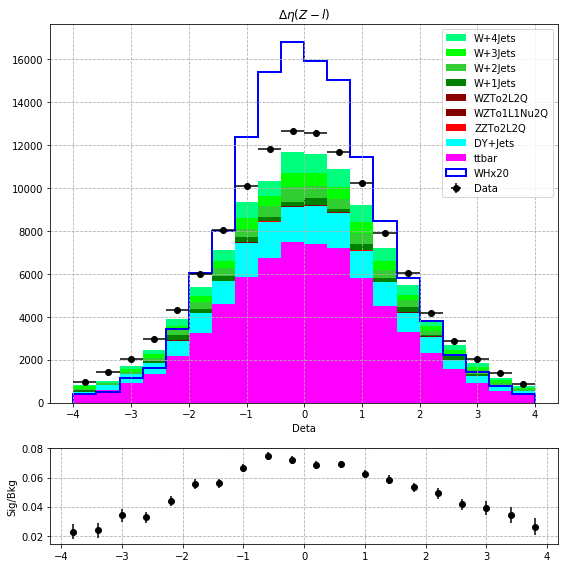

In [31]:
low,high = -4,4
mag = 20
bi = 20
var = 'Deta'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Eta = [
        [lep_eta-Z_eta for lep_eta , Z_eta in zip(np.array(d.lepton_eta), np.array(d.dijet_eta))] 
        for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta \eta (Z-l)$'

ax = plt.gca()
hbkg = ax.hist(
        Eta[:-2],
        bins      = bi,#Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                Eta[-2],
                bins      = bi,#Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(Eta[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    Eta[-1],
                    bins  = bi,#Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_lep_eta.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


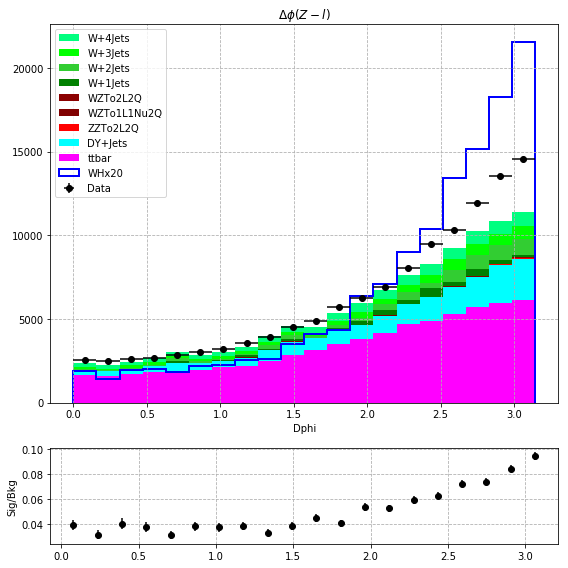

In [32]:
low,high = 0,np.pi
mag = 20
bi = 20
var = 'Dphi'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Phi = [
        [delta_phi(lep_phi,Z_phi) for lep_phi , Z_phi in zip(np.array(d.lepton_phi), np.array(d.dijet_phi))] 
        for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta \phi (Z-l)$'

ax = plt.gca()
hbkg = ax.hist(
        Phi[:-2],
        bins      = bi,#Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                Phi[-2],
                bins      = bi,#Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(Phi[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    Phi[-1],
                    bins  = bi,#Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_lep_phi.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in true_divide
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in multiply


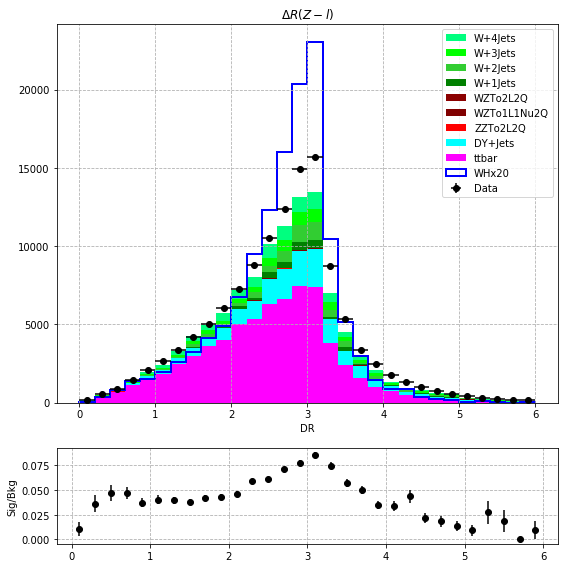

In [33]:
low,high = 0,6
mag = 20
bi = 20
var = 'DR'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
DR = [
        [np.sqrt(eta**2+phi**2) for eta , phi in zip(Eta[i],Phi[i])] 
        for i in range(len(data))]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta R (Z-l)$'

ax = plt.gca()
hbkg = ax.hist(
        DR[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                DR[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(DR[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    DR[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_lep_DR.png")

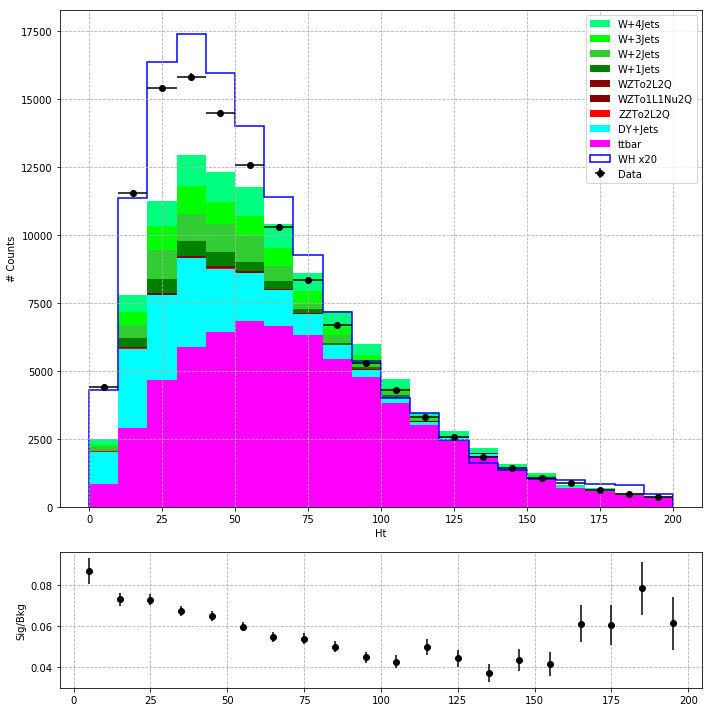

In [34]:
low,high = 0,200
mag = 20
var = 'pt'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Ht = [d.ht       for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        Ht[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.legend()

hsig = plt.hist(
        Ht[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(Ht[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    Ht[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Ht')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"Ht.png")

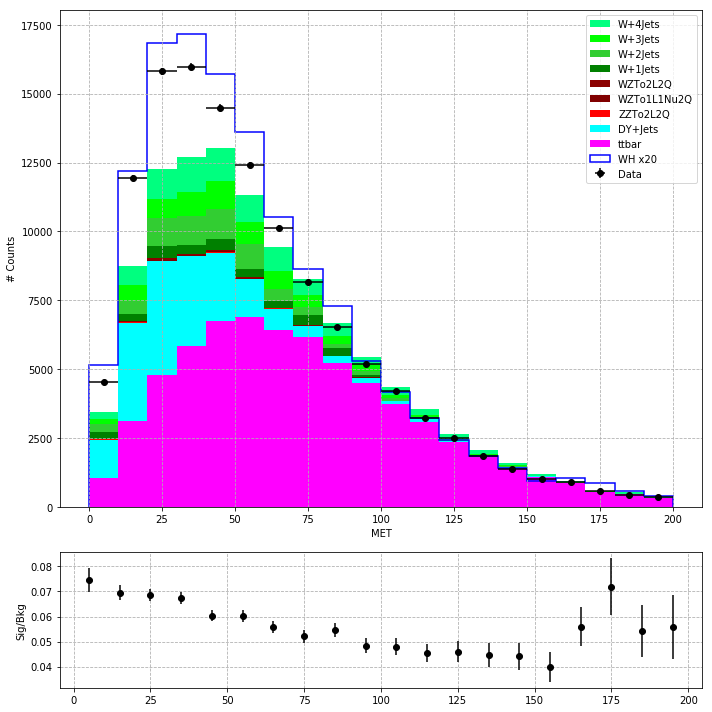

In [35]:
low,high = 0,200
mag = 20
var = 'pt'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
MET = [d.MET       for d in data]
w = [d.weights for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        MET[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.legend()

hsig = plt.hist(
        MET[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(MET[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    MET[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('MET')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"MET.png")

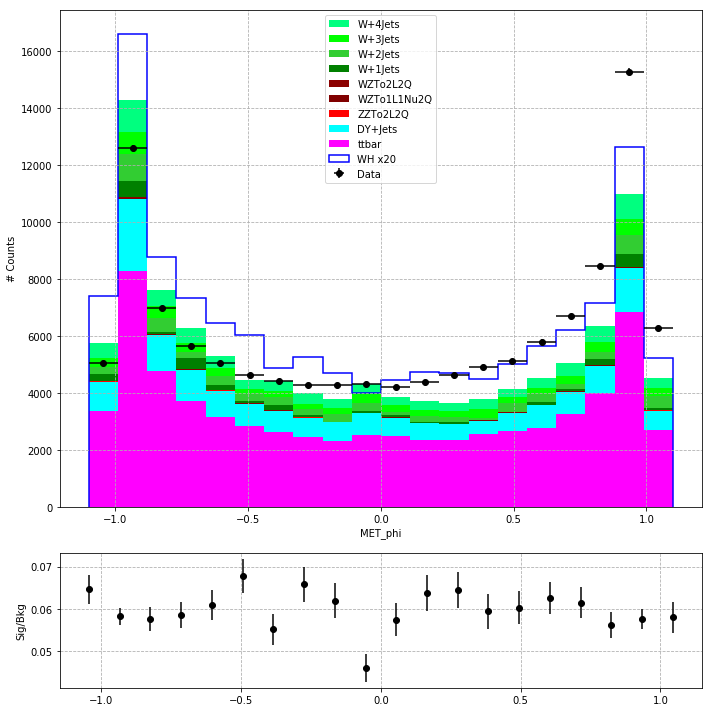

In [36]:
#low,high = -np.pi,np.pi
low,high = -1.1,1.1
mag = 20
var = 'pt'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
MET_phi = [np.cos(d.MET_phi)       for d in data]
w = [d.weights for d in data]


fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        MET_phi[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.legend()

hsig = plt.hist(
        MET_phi[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(MET_phi[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    MET_phi[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('MET_phi')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"MET_phi.png")

# Z - GAMMA

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


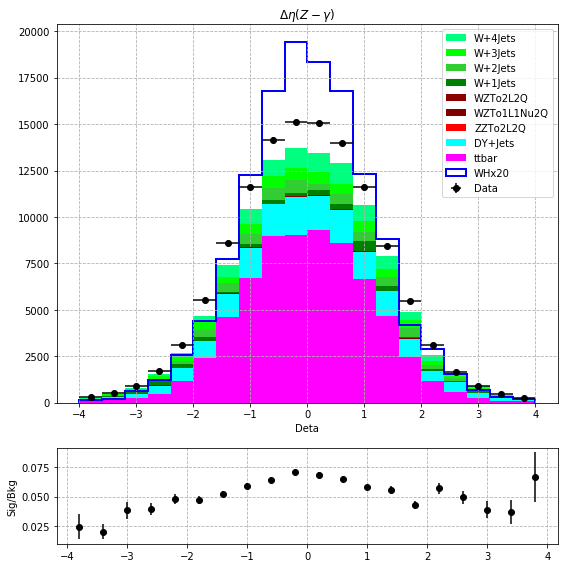

In [37]:
low,high = -4,4
mag = 20
bi = 20
var = 'Deta'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Eta = [
        [gm_eta-Z_eta for gm_eta , Z_eta in zip(np.array(d.photon_eta), np.array(d.dijet_eta))] 
        for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta \eta (Z-\gamma)$'

ax = plt.gca()
hbkg = ax.hist(
        Eta[:-2],
        bins      = bi,#Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                Eta[-2],
                bins      = bi,#Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(Eta[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    Eta[-1],
                    bins  = bi,#Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_gm_eta.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


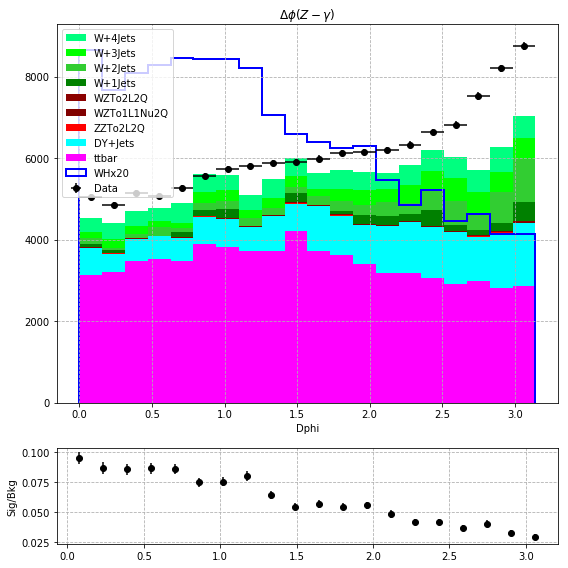

In [38]:
low,high = 0,np.pi
mag = 20
bi = 20
var = 'Dphi'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Phi = [
        [delta_phi(gm_phi,Z_phi) for gm_phi , Z_phi in zip(np.array(d.photon_phi), np.array(d.dijet_phi))] 
        for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta \phi (Z-\gamma)$'

ax = plt.gca()
hbkg = ax.hist(
        Phi[:-2],
        bins      = bi,#Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                Phi[-2],
                bins      = bi,#Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(Phi[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    Phi[-1],
                    bins  = bi,#Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_gm_phi.png")

/home/jcordero/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


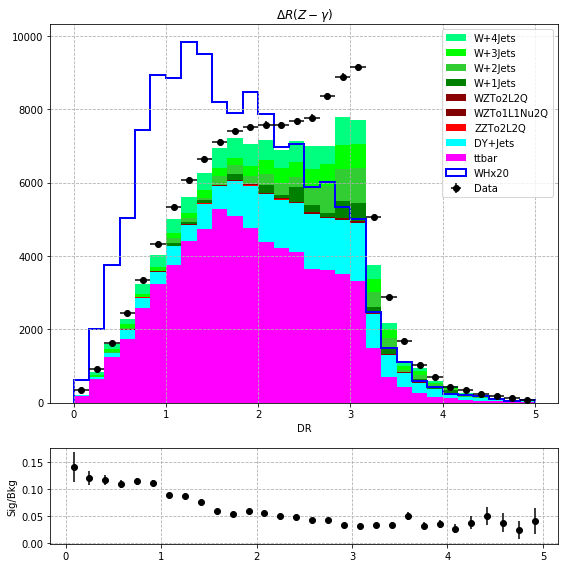

In [39]:
low,high = 0,5
mag = 20
bi = 20
var = 'DR'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
DR = [
        [np.sqrt(eta**2+phi**2) for eta , phi in zip(Eta[i],Phi[i])] 
        for i in range(len(data))]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]


fig = plt.figure(figsize = (8, 8))
#for j,k in zip(range(len(data_pt)),data_pt.keys()):
#for j,k in zip(range(len(values[var])),values[var].keys()):
nx,ny = 3,2
#plt.subplot(nx,ny,j+1)
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
title_lab = r'$\Delta R (Z-\gamma)$'

ax = plt.gca()
hbkg = ax.hist(
        DR[:-2],
        bins      = Help.plotOpsAll[0][    'bins'][var][k],
        #range     = Help.plotOpsAll[0][   'range'][var][k],
        range     = [low,high],
        histtype  = Help.plotOpsAll[0]['histtype'],
        normed    = Help.plotOpsAll[0][  'normed'],
        stacked   = Help.plotOpsAll[0][ 'stacked'],
        color     = Colors[:-2],
        weights   = w[:-2],
        label     = legend,
        #linestyle = line_style[k],
        #linewidth = 1.2
        )
ax.set_title(title_lab)
ax.set_xlabel(var)
ax.grid(linestyle='--')
ax.legend(prop={'size':10})

#----------------------------------------------------------------
#----------------------------------------------------------------
ax = plt.gca()
hsig = ax.hist(
                DR[-2],
                bins      = Help.plotOpsAll[-2][    'bins'][var][k],
                #range     = Help.plotOpsAll[-2][   'range'][var][k],
                range     = [low,high],
                histtype  = Help.plotOpsAll[-2]['histtype'],
                stacked   = Help.plotOpsAll[-2][ 'stacked'],
                color     = Colors[-2],
                weights   = np.ones(np.shape(DR[-2]))*mag,
                label     = legend[-2] + "x"+str(mag),
                linewidth = 2
                )
ax.legend(prop={'size': 10})
#----------------------------------------------------------------
#----------------------------------------------------------------

y3,x3 =np.histogram(
                    DR[-1],
                    bins  = Help.plotOpsAll[-1][ 'bins'][var][k],
                    #range = Help.plotOpsAll[-1]['range'][var][k]
                    range = [low,high],
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr      = np.diff(x3)/2,yerr = np.sqrt(y3),
            color     ='k',
            marker    ='o',
            linestyle ='',
            label     = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.subplot2grid((4,1),(3,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')


plt.tight_layout()        
plt.show()
fig.savefig(figpath+"Z_gm_DR.png")

# HT

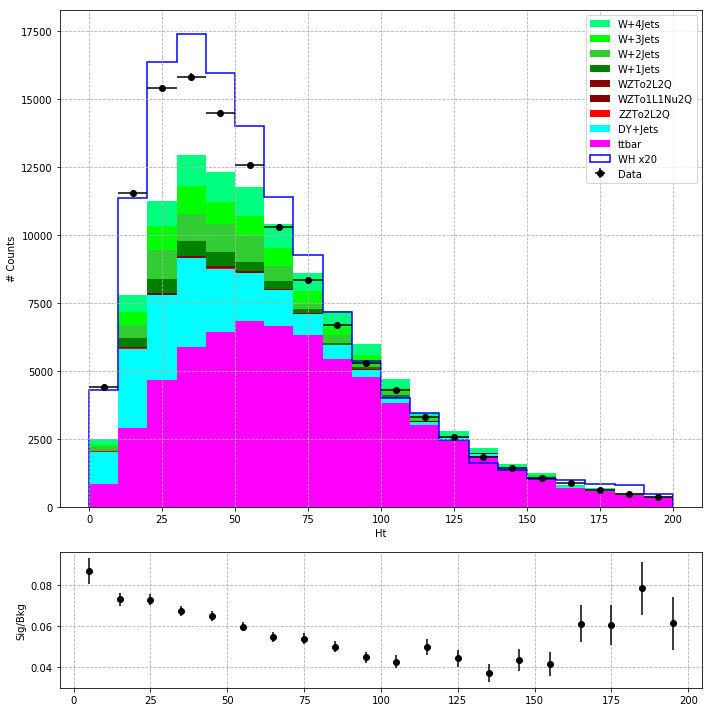

In [40]:
low,high = 0,200
mag = 20
var = 'pt'

legend = [  "ttbar",   "DY+Jets", "ZZTo2L2Q", "WZTo1L1Nu2Q", "WZTo2L2Q", "W+1Jets", "W+2Jets", "W+3Jets", 'W+4Jets',      "WH", 'Data'] # for xsec calc
Colors = ['magenta','cyan','r','maroon','darkred', 'g','limegreen', 'lime','springgreen','b','k']
Ht = [d.ht       for d in data]
w = [
    TT.weights,
    DYJets.weights,
    ZZTo2L2Q.weights,
    WZTo1L1Nu2Q.weights,
    WZTo2L2Q.weights,
    W1Jets.weights,
    W2Jets.weights,
    W3Jets.weights,
    W4Jets.weights,
    WH.weights,
    Muon.weights,
    ]
#nBJets = [d.nBJets for d in data]

fig = plt.figure(figsize=(10,10))
plt.subplot2grid((4,1),(0,0),rowspan = 3, colspan = 1)
plt.grid(linestyle='--')
hbkg= plt.hist(
        Ht[:-2],
        #range    = Help.plotOpsAll[0]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[0]['bins'][var][part],
        histtype = Help.plotOpsAll[0]['histtype'],
        stacked  = True,#Help.plotOpsAll[0]['stacked'],
        label    = legend[:-2],
        color    = Colors[:-2],
        weights = w[:-2],
        )
plt.legend()

hsig = plt.hist(
        Ht[-2],
        #range    = Help.plotOpsAll[-2]['range'][var][part],
        range = [low,high],
        bins = bi,
        #bins     = Help.plotOpsAll[-2]['bins'][var][part],
        histtype = Help.plotOpsAll[-2]['histtype'],
        stacked  = Help.plotOpsAll[-2]['stacked'],
        label    = legend[-2]+" x"+str(mag),
        color    = Colors[-2],
        weights   = np.ones(np.shape(Ht[-2]))*mag,
        linewidth = 1.5
        )

y3,x3 =np.histogram(
                    Ht[-1],
                    #bins  = Help.plotOpsAll[-1]['bins'][var][part],
                    #range = Help.plotOpsAll[-1]['range'][var][part]
                    range = [low,high],
                    bins = bi,
                   )
x3b = (x3[1:len(x3)] + x3[0:-1])/2
ax = plt.gca()
ax.errorbar(x3b,y3,
            xerr = np.diff(x3)/2,yerr = np.sqrt(y3),
            color='k',
            marker='o',
            linestyle='',
            label = legend[-1]
           )
ax.legend(prop={'size': 10})

plt.ylabel('# Counts')
plt.xlabel('Ht')
plt.legend()

plt.subplot2grid((4,1),(3,0),rowspan = 1, colspan = 1)
plt.grid(linestyle='--')
plt.errorbar(
            (hsig[1][1:] + hsig[1][:-1])/2,
            [0 if np.isnan(s/b) else s/b for s,b in zip(hsig[0]/mag,hbkg[0][-1])],
            #hsig[0]/hbkg[0][-1],
            yerr = (hsig[0]/mag)/hbkg[0][-1]*np.sqrt(1/(hsig[0]/mag)+1/hbkg[0][-1]),
            linestyle = '',
            marker = 'o',
            color = 'k'
            )
plt.ylabel('Sig/Bkg')
plt.tight_layout()      
plt.show()
fig.savefig(figpath+"Ht.png")

In [41]:
print(len(DR_higgs[-2]))
print(len(DR[-2]))
print(len(M3[-2]))
print(len(data[-2].dijetgm_m))

6584
6584
360
6584


(array([  0.,  46., 160., 247., 272., 222., 172., 107.,  62.,  42.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

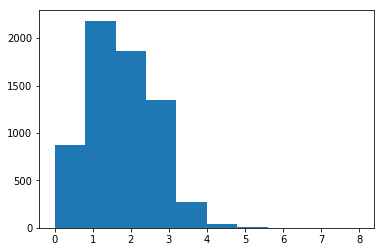

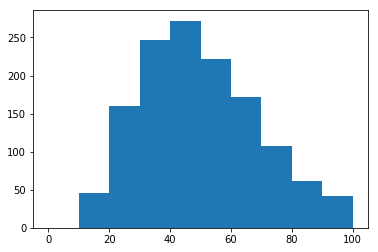

In [42]:
#print(np.array(data[-2].photon_pt) < 38)
#print(DR[-2])
plt.figure()
#plt.hist(np.array(DR[-2])[np.array(data[-2].photon_pt) < 38],
#        range = [0,50])
plt.hist(DR[-2],
        range = [0,8])
plt.figure()
#plt.hist(data[-2].photon_pt,
#        range = [0,100],
#        )
plt.hist(np.array(data[-2].photon_pt)[np.array(DR[-2]) < 1],
        range = [0,100],
        )


#print(values['pt']['gm'][-2])

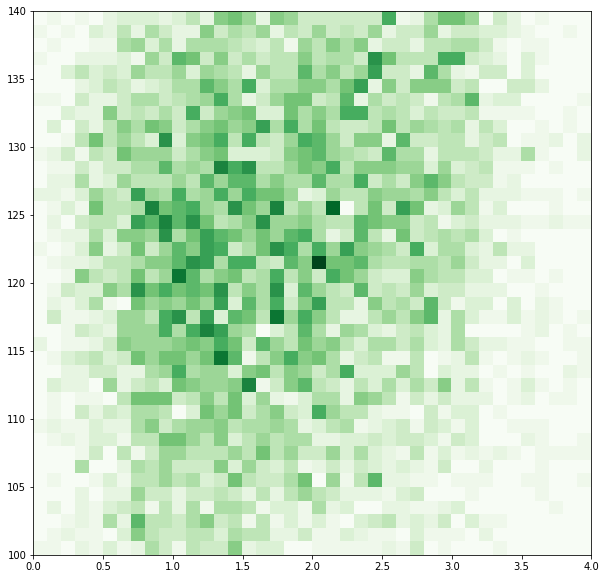

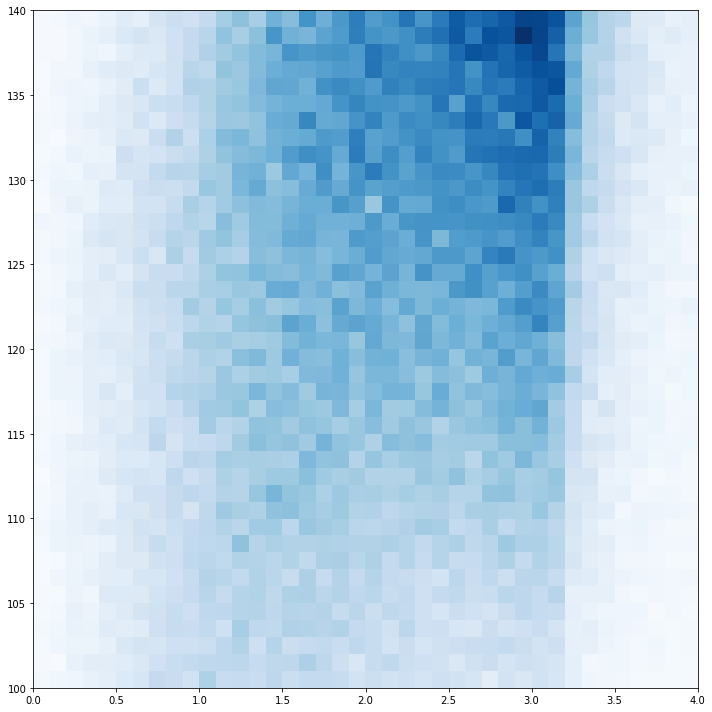

In [43]:
#dx = data[1].photon_pt
dx = DR[-2]

#dy = data[1].lepton_pt
#dy = values['pt']['gm'][-2]
#dy = data[-2].photon_pt
#dy = DR_higgs[-2]
#dy = M3[-2]
dy = data[-2].dijetgm_m

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
h = plt.hist2d(dx, dy, 
                #range = ((0,7),(0,8)) ,
                range = ((0,4),(100,140)) ,
                bins = 40,
                cmap = 'Greens',
                
                )
#plt.colorbar(h[3])
#fig.tight_layout()

dx = DR[-1]
#dy = DR_higgs[-1]
#dy = M3[-1]
dy = data[-1].dijetgm_m

fig = plt.figure(figsize=(10,10))
ax = plt.gca()
h = plt.hist2d(dx, dy, 
                #range = ((0,7),(0,8)) ,
                range = ((0,4),(100,140)) ,
                bins = 40,
                cmap = 'Blues'
                )
#plt.colorbar(h[3])
fig.tight_layout()
plt.show()

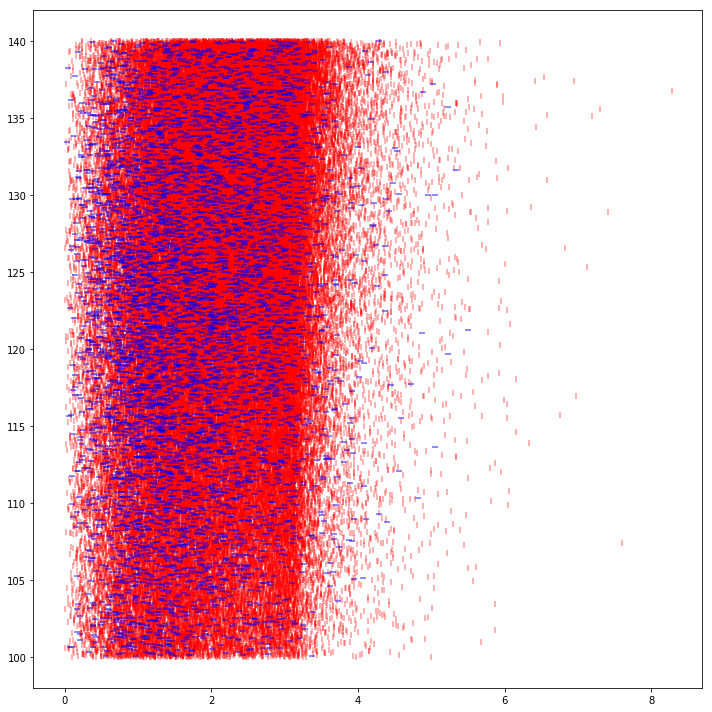

In [44]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()



dx = DR[-1]
#dy = DR_higgs[-1]
dy = data[-1].dijetgm_m
plt.scatter(dx, dy,
            color = 'r',
           marker = '|',
           alpha = 0.4)

dx = DR[-2]
#dy = DR_higgs[-2]
dy = data[-2].dijetgm_m
plt.scatter(dx, dy,
            color = 'b',
           marker = '_',
           alpha = 0.6)


                        
fig.tight_layout()



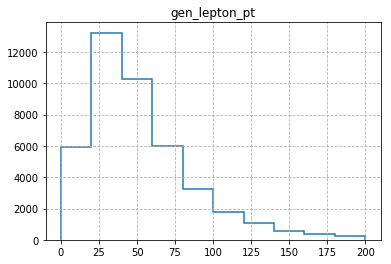

In [45]:
plt.figure()
plt.hist(WH.genlepton_pt,
        range = [0,200],
        histtype = 'step',
        linewidth = 1.5,
        )
plt.title('gen_lepton_pt')
plt.grid(linestyle='--')
plt.show()

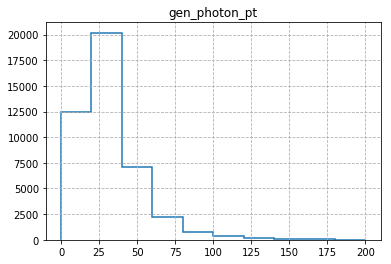

In [46]:
plt.figure()
plt.hist(WH.genphoton_pt,
        range = [0,200],
        histtype = 'step',
        linewidth = 1.5,
        )
plt.title('gen_photon_pt')
plt.grid(linestyle='--')
plt.show()

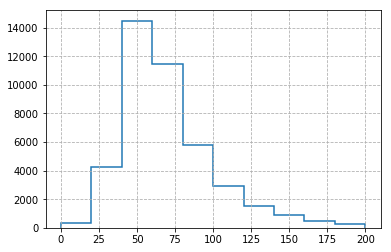

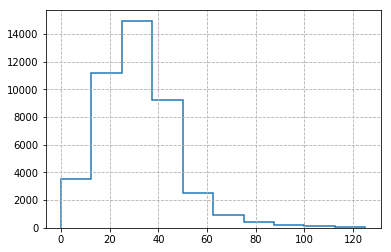

In [47]:
plt.figure()
plt.hist(WH.genjet1_pt,
        range = [0,200],
        histtype = 'step',
        linewidth = 1.5,
        )
plt.grid(linestyle='--')

plt.figure()
plt.hist(WH.genjet2_pt,
        range = [0,125],
        histtype = 'step',
        linewidth = 1.5,)
plt.grid(linestyle='--')

plt.show()

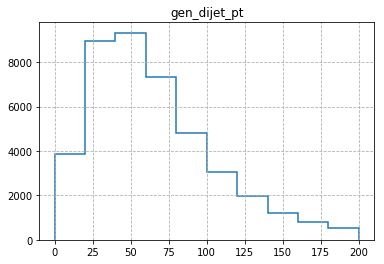

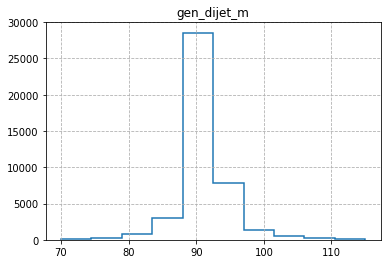

In [48]:
plt.figure()
plt.hist(WH.digenjet_pt,
        range = [0,200],
        histtype = 'step',
        linewidth = 1.5,)
plt.title('gen_dijet_pt')
plt.grid(linestyle='--')


plt.figure()
plt.hist(WH.digenjet_m,
        range = [70,115],
        histtype = 'step',
        linewidth = 1.5,)
plt.title('gen_dijet_m')
plt.grid(linestyle='--')
plt.show()


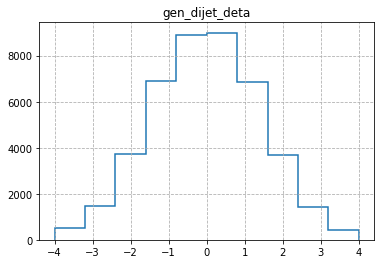

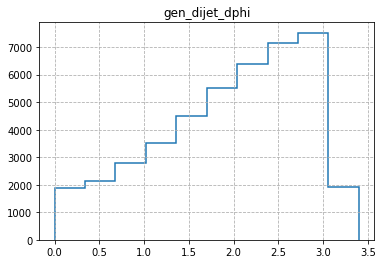

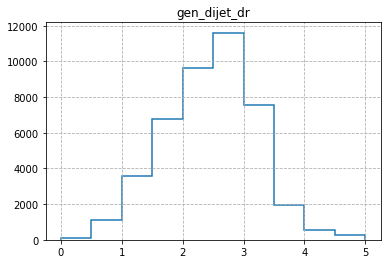

In [49]:
plt.figure()
deta = [ whj1-whj2 for whj1,whj2 in zip(WH.genjet1_eta,WH.genjet2_eta)]
plt.hist(deta,
        range = [-4,4],
        histtype = 'step',
        linewidth = 1.5,)
plt.title('gen_dijet_deta')
plt.grid(linestyle='--')

plt.figure()
dphi = [delta_phi(whj1, whj2) for whj1,whj2 in zip(WH.genjet1_phi,WH.genjet2_phi)]
plt.hist(dphi,
        range = [0,3.4],
        histtype = 'step',
        linewidth = 1.5,)
plt.title('gen_dijet_dphi')
plt.grid(linestyle='--')


dr = [np.sqrt(de**2 + dp**2) for de,dp in zip(deta,dphi)]
plt.figure()
plt.hist(dr,
        range = [0,5],
        histtype = 'step',
        linewidth = 1.5,)
plt.title('gen_dijet_dr')
plt.grid(linestyle='--')
plt.show()